In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Chapter 1 SVM

문제1. data1.csv항목을 불러와주세요

In [2]:
data1 = pd.read_csv('data1.csv')

문제2. target의 setosa를 0으로 versicolor를 1로, virginica를 2로 바꾸어 주세요.

In [3]:
data1.replace(to_replace=['setosa', 'versicolor', 'virginica'],
           value= [0, 1, 2], 
           inplace=True)

In [4]:
data1.drop(['petal length (cm)', 'petal width (cm)'], axis=1, inplace=True)

문제3. Test셋과 Train셋를 나눠주세요. (Test셋의 비율은 0.3입니다)

In [5]:
train_x = data1.drop(['target'], axis = 1)
train_y = data1.target

In [6]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.3, shuffle=True, random_state=6012)

문제4. SVM의 하이퍼 파라미터에 대해서 간단히 적어주세요.

C : 제약조건의 강도  
gamma : 가까이 있는 것에 얼마나 더 가중치를 줄 것이냐

문제5. 하이퍼 파라피터 튜닝을 해주세요. (서칭할 하이퍼 파라미터는 자유롭게 정하셔도 됩니다.)

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
param_grid = {'C': [0.01, 0.1, 1, 10, 30, 50, 70],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [8]:
cv = KFold(n_splits=5, shuffle=True, random_state=6012)
model1 = GridSearchCV(SVC(),param_grid,scoring='accuracy',refit=True,cv=cv)
model1.fit(train_x,train_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=6012, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 30, 50, 70],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='accuracy')

문제6. 최적 파라미터 조합과 결과를 출력하세요.

In [9]:
print(model1.best_estimator_)

SVC(C=10, gamma=0.01)


문제7. 테스트셋를 예측한 뒤 결과를 출력하세요.

In [10]:
model1_predictions = model1.predict(test_x)
print(model1_predictions)

[0 2 1 2 0 2 0 1 2 2 0 1 2 1 2 0 1 2 2 1 0 0 2 1 2 0 1 0 2 1 0 1 0 1 0 0 2
 0 0 2 1 0 0 2 1]


문제8. 다음과 같이 Decision Boundary를 그려보세요.

In [11]:
import matplotlib.pyplot as plt
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z =  model1.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

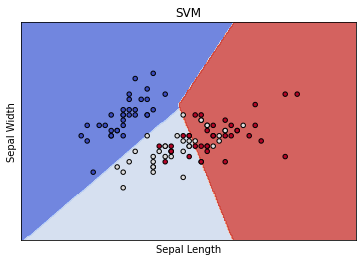

In [12]:
fig, ax = plt.subplots()

title = ('SVM')

X0, X1 = train_x.iloc[:, 0], train_x.iloc[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, model1, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=train_y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('Sepal Width')
ax.set_xlabel('Sepal Length')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

# Chapter 2 LGBM

문제1. data2.csv를 불러와주세요.

In [13]:
data2 = pd.read_csv('data2.csv')

문제2. Test셋과 Train셋를 나눠주세요. Test셋의 비율은 0.3입니다)

In [14]:
train_x = data2.drop(['target'], axis = 1)
train_y = data2.target

In [15]:
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.3, shuffle=True, random_state=6012)

문제3. LGBM 파라미터에 대해서 간단히 적어주세요.

max_depth : Tree의 최대 깊이  
min_data_in_leaf : Leaf가 가지고 있는 최소한의 레코드 수  
feature_fraction : Boosting이 랜덤 포레스트일 경우 사용  
bagging_fraction : 매번 iteration을 돌 때 사용되는 데이터의 일부를 선택하는데 트레이닝 속도를 높이고 과적합을 방지할 때 주로 사용  
early_stopping_round : 분석 속도를 높임  
lambda : lambda 값은 regularization 정규화  
min_gain_to_split : 분기하기 위해 필요한 최소한의 gain을 의미  
max_cat_group : 카테고리 수가 클 때, 과적합을 방지하는 분기 포인트를 찾음  
learning_rate : 최종 결과에 대한 각각의 Tree에 영향을 미치는 변수  
num_leaves : 전체 Tree의 leave 수  
등등..

문제4. LGBM 하이퍼 파라미터 튜닝을 해주세요. (서칭할 하이퍼 파라미터는 자유롭게 정하셔도 됩니다.)

In [16]:
import lightgbm as lgb
from lightgbm import LGBMRegressor

In [17]:
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=0.1, random_state = 6012)

In [18]:
train_y = train_y.astype(np.int)

In [19]:
gridParams = {
    'max_depth': [10, 20],
    'min_child_samples': [20, 40, 60, 80],
    'num_leaves': [60, 70, 80]}

In [20]:
mdl = lgb.LGBMRegressor(
    max_depth = gridParams['max_depth'],
    num_leaves = gridParams['num_leaves'],
    min_child_samples = gridParams['min_child_samples'])

In [21]:
model2 = GridSearchCV(mdl,gridParams,cv=5)

In [22]:
model2.fit(
    train_x,
    train_y,
    eval_set=[(train_x, train_y),(valid_x, valid_y)],
    eval_metric='rmse')

[1]	valid_0's rmse: 1.18068	valid_0's l2: 1.39401	valid_1's rmse: 1.16724	valid_1's l2: 1.36246
[2]	valid_0's rmse: 1.11031	valid_0's l2: 1.23279	valid_1's rmse: 1.10536	valid_1's l2: 1.22182
[3]	valid_0's rmse: 1.04786	valid_0's l2: 1.09801	valid_1's rmse: 1.05195	valid_1's l2: 1.1066
[4]	valid_0's rmse: 0.991887	valid_0's l2: 0.983841	valid_1's rmse: 1.00569	valid_1's l2: 1.0114
[5]	valid_0's rmse: 0.943202	valid_0's l2: 0.88963	valid_1's rmse: 0.964453	valid_1's l2: 0.930169
[6]	valid_0's rmse: 0.898641	valid_0's l2: 0.807555	valid_1's rmse: 0.928194	valid_1's l2: 0.861545
[7]	valid_0's rmse: 0.861372	valid_0's l2: 0.741962	valid_1's rmse: 0.899871	valid_1's l2: 0.809768
[8]	valid_0's rmse: 0.827033	valid_0's l2: 0.683984	valid_1's rmse: 0.874029	valid_1's l2: 0.763927
[9]	valid_0's rmse: 0.797492	valid_0's l2: 0.635994	valid_1's rmse: 0.852814	valid_1's l2: 0.727292
[10]	valid_0's rmse: 0.771697	valid_0's l2: 0.595517	valid_1's rmse: 0.834841	valid_1's l2: 0.696959
[11]	valid_0's r

[1]	valid_0's rmse: 1.18176	valid_0's l2: 1.39656	valid_1's rmse: 1.1677	valid_1's l2: 1.36351
[2]	valid_0's rmse: 1.11061	valid_0's l2: 1.23346	valid_1's rmse: 1.10661	valid_1's l2: 1.22458
[3]	valid_0's rmse: 1.04711	valid_0's l2: 1.09644	valid_1's rmse: 1.05143	valid_1's l2: 1.10549
[4]	valid_0's rmse: 0.988558	valid_0's l2: 0.977247	valid_1's rmse: 1.00219	valid_1's l2: 1.00438
[5]	valid_0's rmse: 0.940239	valid_0's l2: 0.884049	valid_1's rmse: 0.963453	valid_1's l2: 0.928242
[6]	valid_0's rmse: 0.895434	valid_0's l2: 0.801802	valid_1's rmse: 0.926819	valid_1's l2: 0.858993
[7]	valid_0's rmse: 0.858482	valid_0's l2: 0.73699	valid_1's rmse: 0.897719	valid_1's l2: 0.8059
[8]	valid_0's rmse: 0.824796	valid_0's l2: 0.680289	valid_1's rmse: 0.871356	valid_1's l2: 0.759261
[9]	valid_0's rmse: 0.795853	valid_0's l2: 0.633381	valid_1's rmse: 0.850376	valid_1's l2: 0.72314
[10]	valid_0's rmse: 0.770103	valid_0's l2: 0.593058	valid_1's rmse: 0.832065	valid_1's l2: 0.692333
[11]	valid_0's rms

[1]	valid_0's rmse: 1.1804	valid_0's l2: 1.39335	valid_1's rmse: 1.17009	valid_1's l2: 1.36912
[2]	valid_0's rmse: 1.10843	valid_0's l2: 1.22862	valid_1's rmse: 1.10647	valid_1's l2: 1.22428
[3]	valid_0's rmse: 1.045	valid_0's l2: 1.09202	valid_1's rmse: 1.05303	valid_1's l2: 1.10887
[4]	valid_0's rmse: 0.988431	valid_0's l2: 0.976996	valid_1's rmse: 1.00552	valid_1's l2: 1.01107
[5]	valid_0's rmse: 0.939951	valid_0's l2: 0.883508	valid_1's rmse: 0.966568	valid_1's l2: 0.934254
[6]	valid_0's rmse: 0.894976	valid_0's l2: 0.800982	valid_1's rmse: 0.930422	valid_1's l2: 0.865685
[7]	valid_0's rmse: 0.85716	valid_0's l2: 0.734724	valid_1's rmse: 0.901605	valid_1's l2: 0.812891
[8]	valid_0's rmse: 0.822491	valid_0's l2: 0.676491	valid_1's rmse: 0.875805	valid_1's l2: 0.767035
[9]	valid_0's rmse: 0.79264	valid_0's l2: 0.628278	valid_1's rmse: 0.854188	valid_1's l2: 0.729638
[10]	valid_0's rmse: 0.765115	valid_0's l2: 0.585401	valid_1's rmse: 0.834047	valid_1's l2: 0.695634
[11]	valid_0's rms

[1]	valid_0's rmse: 1.18143	valid_0's l2: 1.39577	valid_1's rmse: 1.16941	valid_1's l2: 1.36752
[2]	valid_0's rmse: 1.10669	valid_0's l2: 1.22476	valid_1's rmse: 1.10462	valid_1's l2: 1.22018
[3]	valid_0's rmse: 1.04335	valid_0's l2: 1.08857	valid_1's rmse: 1.05031	valid_1's l2: 1.10316
[4]	valid_0's rmse: 0.985616	valid_0's l2: 0.97144	valid_1's rmse: 1.00146	valid_1's l2: 1.00292
[5]	valid_0's rmse: 0.937961	valid_0's l2: 0.879771	valid_1's rmse: 0.962692	valid_1's l2: 0.926776
[6]	valid_0's rmse: 0.894791	valid_0's l2: 0.800651	valid_1's rmse: 0.929827	valid_1's l2: 0.864579
[7]	valid_0's rmse: 0.854571	valid_0's l2: 0.730291	valid_1's rmse: 0.897188	valid_1's l2: 0.804946
[8]	valid_0's rmse: 0.821901	valid_0's l2: 0.675521	valid_1's rmse: 0.873823	valid_1's l2: 0.763567
[9]	valid_0's rmse: 0.791393	valid_0's l2: 0.626303	valid_1's rmse: 0.852942	valid_1's l2: 0.72751
[10]	valid_0's rmse: 0.764674	valid_0's l2: 0.584726	valid_1's rmse: 0.833578	valid_1's l2: 0.694852
[11]	valid_0's 

[1]	valid_0's rmse: 1.18113	valid_0's l2: 1.39507	valid_1's rmse: 1.1714	valid_1's l2: 1.37219
[2]	valid_0's rmse: 1.10958	valid_0's l2: 1.23116	valid_1's rmse: 1.11018	valid_1's l2: 1.2325
[3]	valid_0's rmse: 1.04286	valid_0's l2: 1.08755	valid_1's rmse: 1.0526	valid_1's l2: 1.10798
[4]	valid_0's rmse: 0.984741	valid_0's l2: 0.969715	valid_1's rmse: 1.0036	valid_1's l2: 1.00721
[5]	valid_0's rmse: 0.935168	valid_0's l2: 0.874539	valid_1's rmse: 0.962235	valid_1's l2: 0.925896
[6]	valid_0's rmse: 0.890217	valid_0's l2: 0.792487	valid_1's rmse: 0.926742	valid_1's l2: 0.858851
[7]	valid_0's rmse: 0.852696	valid_0's l2: 0.72709	valid_1's rmse: 0.896455	valid_1's l2: 0.803632
[8]	valid_0's rmse: 0.819665	valid_0's l2: 0.67185	valid_1's rmse: 0.872165	valid_1's l2: 0.760671
[9]	valid_0's rmse: 0.790809	valid_0's l2: 0.625379	valid_1's rmse: 0.85241	valid_1's l2: 0.726603
[10]	valid_0's rmse: 0.76522	valid_0's l2: 0.585562	valid_1's rmse: 0.833839	valid_1's l2: 0.695288
[11]	valid_0's rmse: 

[1]	valid_0's rmse: 1.17953	valid_0's l2: 1.3913	valid_1's rmse: 1.16747	valid_1's l2: 1.36298
[2]	valid_0's rmse: 1.10759	valid_0's l2: 1.22677	valid_1's rmse: 1.1036	valid_1's l2: 1.21794
[3]	valid_0's rmse: 1.04429	valid_0's l2: 1.09054	valid_1's rmse: 1.04878	valid_1's l2: 1.09993
[4]	valid_0's rmse: 0.987363	valid_0's l2: 0.974886	valid_1's rmse: 1.00061	valid_1's l2: 1.00122
[5]	valid_0's rmse: 0.935693	valid_0's l2: 0.875522	valid_1's rmse: 0.958029	valid_1's l2: 0.917819
[6]	valid_0's rmse: 0.892391	valid_0's l2: 0.796361	valid_1's rmse: 0.923641	valid_1's l2: 0.853113
[7]	valid_0's rmse: 0.852243	valid_0's l2: 0.726317	valid_1's rmse: 0.892525	valid_1's l2: 0.796602
[8]	valid_0's rmse: 0.818057	valid_0's l2: 0.669217	valid_1's rmse: 0.866832	valid_1's l2: 0.751398
[9]	valid_0's rmse: 0.788763	valid_0's l2: 0.622147	valid_1's rmse: 0.846341	valid_1's l2: 0.716294
[10]	valid_0's rmse: 0.762102	valid_0's l2: 0.5808	valid_1's rmse: 0.828182	valid_1's l2: 0.685885
[11]	valid_0's rm

[1]	valid_0's rmse: 1.1805	valid_0's l2: 1.39358	valid_1's rmse: 1.16696	valid_1's l2: 1.3618
[2]	valid_0's rmse: 1.10827	valid_0's l2: 1.22827	valid_1's rmse: 1.10515	valid_1's l2: 1.22136
[3]	valid_0's rmse: 1.04388	valid_0's l2: 1.08969	valid_1's rmse: 1.04988	valid_1's l2: 1.10224
[4]	valid_0's rmse: 0.985055	valid_0's l2: 0.970333	valid_1's rmse: 1.00086	valid_1's l2: 1.00171
[5]	valid_0's rmse: 0.936101	valid_0's l2: 0.876286	valid_1's rmse: 0.962733	valid_1's l2: 0.926855
[6]	valid_0's rmse: 0.89319	valid_0's l2: 0.797789	valid_1's rmse: 0.928426	valid_1's l2: 0.861975
[7]	valid_0's rmse: 0.852045	valid_0's l2: 0.725981	valid_1's rmse: 0.896566	valid_1's l2: 0.80383
[8]	valid_0's rmse: 0.817146	valid_0's l2: 0.667728	valid_1's rmse: 0.870003	valid_1's l2: 0.756905
[9]	valid_0's rmse: 0.786834	valid_0's l2: 0.619107	valid_1's rmse: 0.847376	valid_1's l2: 0.718045
[10]	valid_0's rmse: 0.760606	valid_0's l2: 0.578521	valid_1's rmse: 0.828406	valid_1's l2: 0.686257
[11]	valid_0's rm

[1]	valid_0's rmse: 1.17914	valid_0's l2: 1.39036	valid_1's rmse: 1.16879	valid_1's l2: 1.36606
[2]	valid_0's rmse: 1.10604	valid_0's l2: 1.22332	valid_1's rmse: 1.1044	valid_1's l2: 1.21969
[3]	valid_0's rmse: 1.04141	valid_0's l2: 1.08453	valid_1's rmse: 1.05044	valid_1's l2: 1.10343
[4]	valid_0's rmse: 0.984362	valid_0's l2: 0.968969	valid_1's rmse: 1.00467	valid_1's l2: 1.00936
[5]	valid_0's rmse: 0.935179	valid_0's l2: 0.87456	valid_1's rmse: 0.965354	valid_1's l2: 0.931909
[6]	valid_0's rmse: 0.890103	valid_0's l2: 0.792283	valid_1's rmse: 0.930521	valid_1's l2: 0.86587
[7]	valid_0's rmse: 0.851454	valid_0's l2: 0.724974	valid_1's rmse: 0.900604	valid_1's l2: 0.811088
[8]	valid_0's rmse: 0.81381	valid_0's l2: 0.662287	valid_1's rmse: 0.872614	valid_1's l2: 0.761455
[9]	valid_0's rmse: 0.784745	valid_0's l2: 0.615824	valid_1's rmse: 0.851513	valid_1's l2: 0.725074
[10]	valid_0's rmse: 0.759627	valid_0's l2: 0.577034	valid_1's rmse: 0.834342	valid_1's l2: 0.696126
[11]	valid_0's rm

[1]	valid_0's rmse: 1.18031	valid_0's l2: 1.39314	valid_1's rmse: 1.16895	valid_1's l2: 1.36644
[2]	valid_0's rmse: 1.10434	valid_0's l2: 1.21956	valid_1's rmse: 1.10272	valid_1's l2: 1.21599
[3]	valid_0's rmse: 1.03836	valid_0's l2: 1.07819	valid_1's rmse: 1.04733	valid_1's l2: 1.09691
[4]	valid_0's rmse: 0.982496	valid_0's l2: 0.965299	valid_1's rmse: 1.00146	valid_1's l2: 1.00292
[5]	valid_0's rmse: 0.930186	valid_0's l2: 0.865247	valid_1's rmse: 0.958763	valid_1's l2: 0.919227
[6]	valid_0's rmse: 0.886817	valid_0's l2: 0.786444	valid_1's rmse: 0.924064	valid_1's l2: 0.853894
[7]	valid_0's rmse: 0.846453	valid_0's l2: 0.716483	valid_1's rmse: 0.893339	valid_1's l2: 0.798054
[8]	valid_0's rmse: 0.812728	valid_0's l2: 0.660526	valid_1's rmse: 0.868932	valid_1's l2: 0.755042
[9]	valid_0's rmse: 0.780914	valid_0's l2: 0.609826	valid_1's rmse: 0.844673	valid_1's l2: 0.713472
[10]	valid_0's rmse: 0.754838	valid_0's l2: 0.56978	valid_1's rmse: 0.82525	valid_1's l2: 0.681037
[11]	valid_0's 

[1]	valid_0's rmse: 1.1798	valid_0's l2: 1.39194	valid_1's rmse: 1.17012	valid_1's l2: 1.36918
[2]	valid_0's rmse: 1.10713	valid_0's l2: 1.22574	valid_1's rmse: 1.10714	valid_1's l2: 1.22576
[3]	valid_0's rmse: 1.03992	valid_0's l2: 1.08144	valid_1's rmse: 1.05057	valid_1's l2: 1.10369
[4]	valid_0's rmse: 0.980524	valid_0's l2: 0.961427	valid_1's rmse: 1.00096	valid_1's l2: 1.00192
[5]	valid_0's rmse: 0.931731	valid_0's l2: 0.868124	valid_1's rmse: 0.96064	valid_1's l2: 0.922829
[6]	valid_0's rmse: 0.885969	valid_0's l2: 0.78494	valid_1's rmse: 0.925039	valid_1's l2: 0.855697
[7]	valid_0's rmse: 0.846922	valid_0's l2: 0.717277	valid_1's rmse: 0.894268	valid_1's l2: 0.799715
[8]	valid_0's rmse: 0.812157	valid_0's l2: 0.659598	valid_1's rmse: 0.86901	valid_1's l2: 0.755179
[9]	valid_0's rmse: 0.782925	valid_0's l2: 0.612972	valid_1's rmse: 0.848502	valid_1's l2: 0.719955
[10]	valid_0's rmse: 0.755851	valid_0's l2: 0.571311	valid_1's rmse: 0.830283	valid_1's l2: 0.68937
[11]	valid_0's rms

[1]	valid_0's rmse: 1.17861	valid_0's l2: 1.38913	valid_1's rmse: 1.16678	valid_1's l2: 1.36138
[2]	valid_0's rmse: 1.10627	valid_0's l2: 1.22384	valid_1's rmse: 1.10325	valid_1's l2: 1.21717
[3]	valid_0's rmse: 1.04228	valid_0's l2: 1.08636	valid_1's rmse: 1.04805	valid_1's l2: 1.09841
[4]	valid_0's rmse: 0.984369	valid_0's l2: 0.968983	valid_1's rmse: 0.999813	valid_1's l2: 0.999626
[5]	valid_0's rmse: 0.933865	valid_0's l2: 0.872104	valid_1's rmse: 0.958596	valid_1's l2: 0.918907
[6]	valid_0's rmse: 0.889459	valid_0's l2: 0.791138	valid_1's rmse: 0.923834	valid_1's l2: 0.853469
[7]	valid_0's rmse: 0.849195	valid_0's l2: 0.721132	valid_1's rmse: 0.893388	valid_1's l2: 0.798142
[8]	valid_0's rmse: 0.814275	valid_0's l2: 0.663044	valid_1's rmse: 0.868202	valid_1's l2: 0.753774
[9]	valid_0's rmse: 0.784812	valid_0's l2: 0.615931	valid_1's rmse: 0.8469	valid_1's l2: 0.717239
[10]	valid_0's rmse: 0.75714	valid_0's l2: 0.573262	valid_1's rmse: 0.828725	valid_1's l2: 0.686784
[11]	valid_0's

[1]	valid_0's rmse: 1.17945	valid_0's l2: 1.3911	valid_1's rmse: 1.16613	valid_1's l2: 1.35986
[2]	valid_0's rmse: 1.10635	valid_0's l2: 1.22401	valid_1's rmse: 1.10332	valid_1's l2: 1.21732
[3]	valid_0's rmse: 1.04156	valid_0's l2: 1.08486	valid_1's rmse: 1.04819	valid_1's l2: 1.0987
[4]	valid_0's rmse: 0.984246	valid_0's l2: 0.96874	valid_1's rmse: 1.0026	valid_1's l2: 1.00521
[5]	valid_0's rmse: 0.93418	valid_0's l2: 0.872691	valid_1's rmse: 0.962675	valid_1's l2: 0.926743
[6]	valid_0's rmse: 0.890617	valid_0's l2: 0.793199	valid_1's rmse: 0.928517	valid_1's l2: 0.862143
[7]	valid_0's rmse: 0.851899	valid_0's l2: 0.725732	valid_1's rmse: 0.899051	valid_1's l2: 0.808293
[8]	valid_0's rmse: 0.815224	valid_0's l2: 0.664591	valid_1's rmse: 0.871295	valid_1's l2: 0.759156
[9]	valid_0's rmse: 0.785611	valid_0's l2: 0.617185	valid_1's rmse: 0.850231	valid_1's l2: 0.722892
[10]	valid_0's rmse: 0.758181	valid_0's l2: 0.574838	valid_1's rmse: 0.830853	valid_1's l2: 0.690317
[11]	valid_0's rms

[98]	valid_0's rmse: 0.43402	valid_0's l2: 0.188374	valid_1's rmse: 0.700577	valid_1's l2: 0.490809
[99]	valid_0's rmse: 0.43266	valid_0's l2: 0.187194	valid_1's rmse: 0.700147	valid_1's l2: 0.490205
[100]	valid_0's rmse: 0.431738	valid_0's l2: 0.186398	valid_1's rmse: 0.700294	valid_1's l2: 0.490412
[1]	valid_0's rmse: 1.17824	valid_0's l2: 1.38826	valid_1's rmse: 1.16855	valid_1's l2: 1.36551
[2]	valid_0's rmse: 1.10414	valid_0's l2: 1.21912	valid_1's rmse: 1.10326	valid_1's l2: 1.21719
[3]	valid_0's rmse: 1.03823	valid_0's l2: 1.07792	valid_1's rmse: 1.04937	valid_1's l2: 1.10118
[4]	valid_0's rmse: 0.981968	valid_0's l2: 0.964261	valid_1's rmse: 1.00351	valid_1's l2: 1.00703
[5]	valid_0's rmse: 0.929428	valid_0's l2: 0.863836	valid_1's rmse: 0.960815	valid_1's l2: 0.923165
[6]	valid_0's rmse: 0.884612	valid_0's l2: 0.782538	valid_1's rmse: 0.926738	valid_1's l2: 0.858843
[7]	valid_0's rmse: 0.845247	valid_0's l2: 0.714442	valid_1's rmse: 0.89717	valid_1's l2: 0.804914
[8]	valid_0's

[81]	valid_0's rmse: 0.447855	valid_0's l2: 0.200574	valid_1's rmse: 0.700784	valid_1's l2: 0.491099
[82]	valid_0's rmse: 0.446649	valid_0's l2: 0.199495	valid_1's rmse: 0.700105	valid_1's l2: 0.490148
[83]	valid_0's rmse: 0.445591	valid_0's l2: 0.198551	valid_1's rmse: 0.700331	valid_1's l2: 0.490463
[84]	valid_0's rmse: 0.444798	valid_0's l2: 0.197845	valid_1's rmse: 0.700208	valid_1's l2: 0.490291
[85]	valid_0's rmse: 0.44364	valid_0's l2: 0.196816	valid_1's rmse: 0.699962	valid_1's l2: 0.489946
[86]	valid_0's rmse: 0.442374	valid_0's l2: 0.195695	valid_1's rmse: 0.699712	valid_1's l2: 0.489597
[87]	valid_0's rmse: 0.441143	valid_0's l2: 0.194607	valid_1's rmse: 0.699772	valid_1's l2: 0.489681
[88]	valid_0's rmse: 0.440639	valid_0's l2: 0.194163	valid_1's rmse: 0.699455	valid_1's l2: 0.489237
[89]	valid_0's rmse: 0.439624	valid_0's l2: 0.193269	valid_1's rmse: 0.698942	valid_1's l2: 0.48852
[90]	valid_0's rmse: 0.439068	valid_0's l2: 0.192781	valid_1's rmse: 0.699097	valid_1's l2: 0

[63]	valid_0's rmse: 0.465493	valid_0's l2: 0.216683	valid_1's rmse: 0.695271	valid_1's l2: 0.483402
[64]	valid_0's rmse: 0.464222	valid_0's l2: 0.215502	valid_1's rmse: 0.695244	valid_1's l2: 0.483364
[65]	valid_0's rmse: 0.462707	valid_0's l2: 0.214098	valid_1's rmse: 0.695269	valid_1's l2: 0.483399
[66]	valid_0's rmse: 0.462172	valid_0's l2: 0.213603	valid_1's rmse: 0.694993	valid_1's l2: 0.483015
[67]	valid_0's rmse: 0.461126	valid_0's l2: 0.212637	valid_1's rmse: 0.694947	valid_1's l2: 0.482952
[68]	valid_0's rmse: 0.459795	valid_0's l2: 0.211411	valid_1's rmse: 0.694687	valid_1's l2: 0.48259
[69]	valid_0's rmse: 0.458427	valid_0's l2: 0.210156	valid_1's rmse: 0.694739	valid_1's l2: 0.482662
[70]	valid_0's rmse: 0.457568	valid_0's l2: 0.209369	valid_1's rmse: 0.695277	valid_1's l2: 0.483409
[71]	valid_0's rmse: 0.456025	valid_0's l2: 0.207959	valid_1's rmse: 0.694638	valid_1's l2: 0.482522
[72]	valid_0's rmse: 0.454781	valid_0's l2: 0.206826	valid_1's rmse: 0.694531	valid_1's l2: 

[46]	valid_0's rmse: 0.496286	valid_0's l2: 0.2463	valid_1's rmse: 0.709133	valid_1's l2: 0.50287
[47]	valid_0's rmse: 0.494449	valid_0's l2: 0.24448	valid_1's rmse: 0.708922	valid_1's l2: 0.50257
[48]	valid_0's rmse: 0.493265	valid_0's l2: 0.24331	valid_1's rmse: 0.708715	valid_1's l2: 0.502276
[49]	valid_0's rmse: 0.491085	valid_0's l2: 0.241165	valid_1's rmse: 0.708157	valid_1's l2: 0.501486
[50]	valid_0's rmse: 0.488915	valid_0's l2: 0.239038	valid_1's rmse: 0.708075	valid_1's l2: 0.501371
[51]	valid_0's rmse: 0.487398	valid_0's l2: 0.237557	valid_1's rmse: 0.707848	valid_1's l2: 0.501049
[52]	valid_0's rmse: 0.485227	valid_0's l2: 0.235445	valid_1's rmse: 0.707552	valid_1's l2: 0.500629
[53]	valid_0's rmse: 0.483513	valid_0's l2: 0.233785	valid_1's rmse: 0.707465	valid_1's l2: 0.500507
[54]	valid_0's rmse: 0.482464	valid_0's l2: 0.232772	valid_1's rmse: 0.707306	valid_1's l2: 0.500282
[55]	valid_0's rmse: 0.480845	valid_0's l2: 0.231212	valid_1's rmse: 0.706962	valid_1's l2: 0.499

[41]	valid_0's rmse: 0.533244	valid_0's l2: 0.28435	valid_1's rmse: 0.706997	valid_1's l2: 0.499845
[42]	valid_0's rmse: 0.531478	valid_0's l2: 0.282469	valid_1's rmse: 0.706799	valid_1's l2: 0.499565
[43]	valid_0's rmse: 0.530238	valid_0's l2: 0.281152	valid_1's rmse: 0.706303	valid_1's l2: 0.498863
[44]	valid_0's rmse: 0.528519	valid_0's l2: 0.279333	valid_1's rmse: 0.705925	valid_1's l2: 0.498331
[45]	valid_0's rmse: 0.525975	valid_0's l2: 0.27665	valid_1's rmse: 0.704787	valid_1's l2: 0.496724
[46]	valid_0's rmse: 0.523779	valid_0's l2: 0.274345	valid_1's rmse: 0.704623	valid_1's l2: 0.496493
[47]	valid_0's rmse: 0.522529	valid_0's l2: 0.273036	valid_1's rmse: 0.704451	valid_1's l2: 0.496251
[48]	valid_0's rmse: 0.520535	valid_0's l2: 0.270957	valid_1's rmse: 0.704176	valid_1's l2: 0.495864
[49]	valid_0's rmse: 0.518846	valid_0's l2: 0.269202	valid_1's rmse: 0.70401	valid_1's l2: 0.495631
[50]	valid_0's rmse: 0.517541	valid_0's l2: 0.267849	valid_1's rmse: 0.703863	valid_1's l2: 0.

[52]	valid_0's rmse: 0.516146	valid_0's l2: 0.266407	valid_1's rmse: 0.702419	valid_1's l2: 0.493393
[53]	valid_0's rmse: 0.514715	valid_0's l2: 0.264931	valid_1's rmse: 0.702499	valid_1's l2: 0.493505
[54]	valid_0's rmse: 0.512911	valid_0's l2: 0.263077	valid_1's rmse: 0.701977	valid_1's l2: 0.492772
[55]	valid_0's rmse: 0.511236	valid_0's l2: 0.261362	valid_1's rmse: 0.701875	valid_1's l2: 0.492629
[56]	valid_0's rmse: 0.510339	valid_0's l2: 0.260446	valid_1's rmse: 0.701847	valid_1's l2: 0.492589
[57]	valid_0's rmse: 0.509267	valid_0's l2: 0.259353	valid_1's rmse: 0.701835	valid_1's l2: 0.492572
[58]	valid_0's rmse: 0.508349	valid_0's l2: 0.258419	valid_1's rmse: 0.701992	valid_1's l2: 0.492793
[59]	valid_0's rmse: 0.506727	valid_0's l2: 0.256773	valid_1's rmse: 0.701253	valid_1's l2: 0.491756
[60]	valid_0's rmse: 0.50503	valid_0's l2: 0.255055	valid_1's rmse: 0.700357	valid_1's l2: 0.4905
[61]	valid_0's rmse: 0.503632	valid_0's l2: 0.253645	valid_1's rmse: 0.700192	valid_1's l2: 0.

[60]	valid_0's rmse: 0.507751	valid_0's l2: 0.257811	valid_1's rmse: 0.705774	valid_1's l2: 0.498116
[61]	valid_0's rmse: 0.50611	valid_0's l2: 0.256147	valid_1's rmse: 0.705725	valid_1's l2: 0.498048
[62]	valid_0's rmse: 0.504872	valid_0's l2: 0.254896	valid_1's rmse: 0.705639	valid_1's l2: 0.497927
[63]	valid_0's rmse: 0.50372	valid_0's l2: 0.253734	valid_1's rmse: 0.705505	valid_1's l2: 0.497737
[64]	valid_0's rmse: 0.502461	valid_0's l2: 0.252467	valid_1's rmse: 0.705272	valid_1's l2: 0.497408
[65]	valid_0's rmse: 0.501392	valid_0's l2: 0.251394	valid_1's rmse: 0.705401	valid_1's l2: 0.49759
[66]	valid_0's rmse: 0.500223	valid_0's l2: 0.250223	valid_1's rmse: 0.705362	valid_1's l2: 0.497536
[67]	valid_0's rmse: 0.499552	valid_0's l2: 0.249553	valid_1's rmse: 0.705374	valid_1's l2: 0.497553
[68]	valid_0's rmse: 0.4983	valid_0's l2: 0.248303	valid_1's rmse: 0.705175	valid_1's l2: 0.497272
[69]	valid_0's rmse: 0.4974	valid_0's l2: 0.247406	valid_1's rmse: 0.704795	valid_1's l2: 0.4967

[70]	valid_0's rmse: 0.488843	valid_0's l2: 0.238968	valid_1's rmse: 0.698278	valid_1's l2: 0.487592
[71]	valid_0's rmse: 0.487963	valid_0's l2: 0.238108	valid_1's rmse: 0.698023	valid_1's l2: 0.487236
[72]	valid_0's rmse: 0.486792	valid_0's l2: 0.236967	valid_1's rmse: 0.697357	valid_1's l2: 0.486306
[73]	valid_0's rmse: 0.485588	valid_0's l2: 0.235796	valid_1's rmse: 0.697284	valid_1's l2: 0.486205
[74]	valid_0's rmse: 0.484325	valid_0's l2: 0.234571	valid_1's rmse: 0.696781	valid_1's l2: 0.485504
[75]	valid_0's rmse: 0.483385	valid_0's l2: 0.233661	valid_1's rmse: 0.696717	valid_1's l2: 0.485414
[76]	valid_0's rmse: 0.482604	valid_0's l2: 0.232907	valid_1's rmse: 0.696234	valid_1's l2: 0.484742
[77]	valid_0's rmse: 0.481521	valid_0's l2: 0.231863	valid_1's rmse: 0.696419	valid_1's l2: 0.484999
[78]	valid_0's rmse: 0.480466	valid_0's l2: 0.230847	valid_1's rmse: 0.696168	valid_1's l2: 0.48465
[79]	valid_0's rmse: 0.479673	valid_0's l2: 0.230086	valid_1's rmse: 0.696175	valid_1's l2: 

[75]	valid_0's rmse: 0.48919	valid_0's l2: 0.239307	valid_1's rmse: 0.701785	valid_1's l2: 0.492502
[76]	valid_0's rmse: 0.488703	valid_0's l2: 0.23883	valid_1's rmse: 0.701801	valid_1's l2: 0.492524
[77]	valid_0's rmse: 0.487818	valid_0's l2: 0.237966	valid_1's rmse: 0.701755	valid_1's l2: 0.492461
[78]	valid_0's rmse: 0.486606	valid_0's l2: 0.236785	valid_1's rmse: 0.701553	valid_1's l2: 0.492176
[79]	valid_0's rmse: 0.485718	valid_0's l2: 0.235922	valid_1's rmse: 0.701377	valid_1's l2: 0.491929
[80]	valid_0's rmse: 0.484923	valid_0's l2: 0.235151	valid_1's rmse: 0.701321	valid_1's l2: 0.491851
[81]	valid_0's rmse: 0.484331	valid_0's l2: 0.234576	valid_1's rmse: 0.701392	valid_1's l2: 0.49195
[82]	valid_0's rmse: 0.483955	valid_0's l2: 0.234212	valid_1's rmse: 0.701477	valid_1's l2: 0.49207
[83]	valid_0's rmse: 0.482694	valid_0's l2: 0.232993	valid_1's rmse: 0.701149	valid_1's l2: 0.491609
[84]	valid_0's rmse: 0.481647	valid_0's l2: 0.231984	valid_1's rmse: 0.700653	valid_1's l2: 0.4

[73]	valid_0's rmse: 0.486642	valid_0's l2: 0.23682	valid_1's rmse: 0.704299	valid_1's l2: 0.496037
[74]	valid_0's rmse: 0.486128	valid_0's l2: 0.236321	valid_1's rmse: 0.704536	valid_1's l2: 0.496371
[75]	valid_0's rmse: 0.485139	valid_0's l2: 0.235359	valid_1's rmse: 0.704592	valid_1's l2: 0.49645
[76]	valid_0's rmse: 0.484637	valid_0's l2: 0.234873	valid_1's rmse: 0.704669	valid_1's l2: 0.496558
[77]	valid_0's rmse: 0.483268	valid_0's l2: 0.233548	valid_1's rmse: 0.704127	valid_1's l2: 0.495795
[78]	valid_0's rmse: 0.482182	valid_0's l2: 0.232499	valid_1's rmse: 0.704008	valid_1's l2: 0.495627
[79]	valid_0's rmse: 0.481221	valid_0's l2: 0.231574	valid_1's rmse: 0.703929	valid_1's l2: 0.495516
[80]	valid_0's rmse: 0.480207	valid_0's l2: 0.230599	valid_1's rmse: 0.704004	valid_1's l2: 0.495621
[81]	valid_0's rmse: 0.479056	valid_0's l2: 0.229495	valid_1's rmse: 0.703552	valid_1's l2: 0.494985
[82]	valid_0's rmse: 0.478427	valid_0's l2: 0.228893	valid_1's rmse: 0.703477	valid_1's l2: 0

[58]	valid_0's rmse: 0.504194	valid_0's l2: 0.254212	valid_1's rmse: 0.702982	valid_1's l2: 0.494183
[59]	valid_0's rmse: 0.503224	valid_0's l2: 0.253235	valid_1's rmse: 0.702876	valid_1's l2: 0.494035
[60]	valid_0's rmse: 0.501869	valid_0's l2: 0.251873	valid_1's rmse: 0.702581	valid_1's l2: 0.49362
[61]	valid_0's rmse: 0.500963	valid_0's l2: 0.250964	valid_1's rmse: 0.702751	valid_1's l2: 0.493859
[62]	valid_0's rmse: 0.500449	valid_0's l2: 0.250449	valid_1's rmse: 0.702687	valid_1's l2: 0.493768
[63]	valid_0's rmse: 0.49896	valid_0's l2: 0.248961	valid_1's rmse: 0.70278	valid_1's l2: 0.4939
[64]	valid_0's rmse: 0.497653	valid_0's l2: 0.247659	valid_1's rmse: 0.702485	valid_1's l2: 0.493485
[65]	valid_0's rmse: 0.497142	valid_0's l2: 0.24715	valid_1's rmse: 0.702664	valid_1's l2: 0.493736
[66]	valid_0's rmse: 0.49631	valid_0's l2: 0.246323	valid_1's rmse: 0.702586	valid_1's l2: 0.493627
[67]	valid_0's rmse: 0.495306	valid_0's l2: 0.245328	valid_1's rmse: 0.702247	valid_1's l2: 0.4931

[59]	valid_0's rmse: 0.504082	valid_0's l2: 0.254098	valid_1's rmse: 0.707722	valid_1's l2: 0.500871
[60]	valid_0's rmse: 0.503397	valid_0's l2: 0.253408	valid_1's rmse: 0.707262	valid_1's l2: 0.50022
[61]	valid_0's rmse: 0.503147	valid_0's l2: 0.253157	valid_1's rmse: 0.707324	valid_1's l2: 0.500307
[62]	valid_0's rmse: 0.502014	valid_0's l2: 0.252018	valid_1's rmse: 0.706891	valid_1's l2: 0.499695
[63]	valid_0's rmse: 0.501067	valid_0's l2: 0.251068	valid_1's rmse: 0.70681	valid_1's l2: 0.499581
[64]	valid_0's rmse: 0.499517	valid_0's l2: 0.249517	valid_1's rmse: 0.706654	valid_1's l2: 0.49936
[65]	valid_0's rmse: 0.497906	valid_0's l2: 0.24791	valid_1's rmse: 0.705684	valid_1's l2: 0.49799
[66]	valid_0's rmse: 0.49691	valid_0's l2: 0.246919	valid_1's rmse: 0.705191	valid_1's l2: 0.497294
[67]	valid_0's rmse: 0.495741	valid_0's l2: 0.245759	valid_1's rmse: 0.705143	valid_1's l2: 0.497227
[68]	valid_0's rmse: 0.494398	valid_0's l2: 0.244429	valid_1's rmse: 0.704929	valid_1's l2: 0.496

[59]	valid_0's rmse: 0.497516	valid_0's l2: 0.247522	valid_1's rmse: 0.699213	valid_1's l2: 0.488899
[60]	valid_0's rmse: 0.496141	valid_0's l2: 0.246156	valid_1's rmse: 0.698508	valid_1's l2: 0.487914
[61]	valid_0's rmse: 0.494807	valid_0's l2: 0.244834	valid_1's rmse: 0.698918	valid_1's l2: 0.488486
[62]	valid_0's rmse: 0.49422	valid_0's l2: 0.244253	valid_1's rmse: 0.698711	valid_1's l2: 0.488196
[63]	valid_0's rmse: 0.492834	valid_0's l2: 0.242886	valid_1's rmse: 0.698192	valid_1's l2: 0.487472
[64]	valid_0's rmse: 0.491601	valid_0's l2: 0.241672	valid_1's rmse: 0.698283	valid_1's l2: 0.487599
[65]	valid_0's rmse: 0.4897	valid_0's l2: 0.239807	valid_1's rmse: 0.697375	valid_1's l2: 0.486332
[66]	valid_0's rmse: 0.48904	valid_0's l2: 0.239161	valid_1's rmse: 0.697652	valid_1's l2: 0.486718
[67]	valid_0's rmse: 0.488533	valid_0's l2: 0.238665	valid_1's rmse: 0.697529	valid_1's l2: 0.486547
[68]	valid_0's rmse: 0.487961	valid_0's l2: 0.238106	valid_1's rmse: 0.697368	valid_1's l2: 0.4

[55]	valid_0's rmse: 0.505856	valid_0's l2: 0.25589	valid_1's rmse: 0.705553	valid_1's l2: 0.497805
[56]	valid_0's rmse: 0.505354	valid_0's l2: 0.255383	valid_1's rmse: 0.705294	valid_1's l2: 0.497439
[57]	valid_0's rmse: 0.503863	valid_0's l2: 0.253878	valid_1's rmse: 0.705238	valid_1's l2: 0.497361
[58]	valid_0's rmse: 0.503123	valid_0's l2: 0.253133	valid_1's rmse: 0.704765	valid_1's l2: 0.496693
[59]	valid_0's rmse: 0.50207	valid_0's l2: 0.252075	valid_1's rmse: 0.704676	valid_1's l2: 0.496568
[60]	valid_0's rmse: 0.500887	valid_0's l2: 0.250888	valid_1's rmse: 0.704073	valid_1's l2: 0.495718
[61]	valid_0's rmse: 0.500076	valid_0's l2: 0.250076	valid_1's rmse: 0.704093	valid_1's l2: 0.495747
[62]	valid_0's rmse: 0.499227	valid_0's l2: 0.249227	valid_1's rmse: 0.703785	valid_1's l2: 0.495313
[63]	valid_0's rmse: 0.497527	valid_0's l2: 0.247533	valid_1's rmse: 0.703891	valid_1's l2: 0.495462
[64]	valid_0's rmse: 0.496428	valid_0's l2: 0.246441	valid_1's rmse: 0.703885	valid_1's l2: 0

[47]	valid_0's rmse: 0.513068	valid_0's l2: 0.263238	valid_1's rmse: 0.70854	valid_1's l2: 0.502029
[48]	valid_0's rmse: 0.511661	valid_0's l2: 0.261797	valid_1's rmse: 0.707424	valid_1's l2: 0.500448
[49]	valid_0's rmse: 0.510739	valid_0's l2: 0.260854	valid_1's rmse: 0.707736	valid_1's l2: 0.50089
[50]	valid_0's rmse: 0.509087	valid_0's l2: 0.259169	valid_1's rmse: 0.706802	valid_1's l2: 0.499569
[51]	valid_0's rmse: 0.506699	valid_0's l2: 0.256744	valid_1's rmse: 0.706008	valid_1's l2: 0.498448
[52]	valid_0's rmse: 0.504803	valid_0's l2: 0.254826	valid_1's rmse: 0.705321	valid_1's l2: 0.497478
[53]	valid_0's rmse: 0.503613	valid_0's l2: 0.253626	valid_1's rmse: 0.705501	valid_1's l2: 0.497732
[54]	valid_0's rmse: 0.502971	valid_0's l2: 0.25298	valid_1's rmse: 0.705378	valid_1's l2: 0.497557
[55]	valid_0's rmse: 0.501836	valid_0's l2: 0.251839	valid_1's rmse: 0.704832	valid_1's l2: 0.496788
[56]	valid_0's rmse: 0.50071	valid_0's l2: 0.25071	valid_1's rmse: 0.704327	valid_1's l2: 0.49

[44]	valid_0's rmse: 0.518425	valid_0's l2: 0.268764	valid_1's rmse: 0.707435	valid_1's l2: 0.500464
[45]	valid_0's rmse: 0.516795	valid_0's l2: 0.267077	valid_1's rmse: 0.707099	valid_1's l2: 0.499989
[46]	valid_0's rmse: 0.515052	valid_0's l2: 0.265279	valid_1's rmse: 0.706614	valid_1's l2: 0.499303
[47]	valid_0's rmse: 0.513372	valid_0's l2: 0.26355	valid_1's rmse: 0.706776	valid_1's l2: 0.499532
[48]	valid_0's rmse: 0.511788	valid_0's l2: 0.261927	valid_1's rmse: 0.70613	valid_1's l2: 0.49862
[49]	valid_0's rmse: 0.510136	valid_0's l2: 0.260239	valid_1's rmse: 0.705403	valid_1's l2: 0.497593
[50]	valid_0's rmse: 0.508902	valid_0's l2: 0.258981	valid_1's rmse: 0.70536	valid_1's l2: 0.497533
[51]	valid_0's rmse: 0.508176	valid_0's l2: 0.258243	valid_1's rmse: 0.705258	valid_1's l2: 0.497389
[52]	valid_0's rmse: 0.506836	valid_0's l2: 0.256883	valid_1's rmse: 0.705441	valid_1's l2: 0.497646
[53]	valid_0's rmse: 0.506079	valid_0's l2: 0.256116	valid_1's rmse: 0.705253	valid_1's l2: 0.4

[44]	valid_0's rmse: 0.517515	valid_0's l2: 0.267822	valid_1's rmse: 0.709516	valid_1's l2: 0.503413
[45]	valid_0's rmse: 0.516293	valid_0's l2: 0.266559	valid_1's rmse: 0.709285	valid_1's l2: 0.503086
[46]	valid_0's rmse: 0.514315	valid_0's l2: 0.26452	valid_1's rmse: 0.70912	valid_1's l2: 0.502851
[47]	valid_0's rmse: 0.512925	valid_0's l2: 0.263092	valid_1's rmse: 0.708728	valid_1's l2: 0.502295
[48]	valid_0's rmse: 0.51179	valid_0's l2: 0.261929	valid_1's rmse: 0.70821	valid_1's l2: 0.501562
[49]	valid_0's rmse: 0.510818	valid_0's l2: 0.260935	valid_1's rmse: 0.708193	valid_1's l2: 0.501538
[50]	valid_0's rmse: 0.509569	valid_0's l2: 0.25966	valid_1's rmse: 0.707867	valid_1's l2: 0.501076
[51]	valid_0's rmse: 0.508968	valid_0's l2: 0.259049	valid_1's rmse: 0.708061	valid_1's l2: 0.50135
[52]	valid_0's rmse: 0.507392	valid_0's l2: 0.257447	valid_1's rmse: 0.707978	valid_1's l2: 0.501232
[53]	valid_0's rmse: 0.506667	valid_0's l2: 0.256711	valid_1's rmse: 0.708227	valid_1's l2: 0.501

[43]	valid_0's rmse: 0.514203	valid_0's l2: 0.264404	valid_1's rmse: 0.706008	valid_1's l2: 0.498447
[44]	valid_0's rmse: 0.512654	valid_0's l2: 0.262814	valid_1's rmse: 0.705989	valid_1's l2: 0.49842
[45]	valid_0's rmse: 0.511286	valid_0's l2: 0.261413	valid_1's rmse: 0.70593	valid_1's l2: 0.498337
[46]	valid_0's rmse: 0.509685	valid_0's l2: 0.259779	valid_1's rmse: 0.7057	valid_1's l2: 0.498012
[47]	valid_0's rmse: 0.508757	valid_0's l2: 0.258834	valid_1's rmse: 0.705261	valid_1's l2: 0.497392
[48]	valid_0's rmse: 0.50725	valid_0's l2: 0.257302	valid_1's rmse: 0.705028	valid_1's l2: 0.497064
[49]	valid_0's rmse: 0.506118	valid_0's l2: 0.256155	valid_1's rmse: 0.7056	valid_1's l2: 0.497872
[50]	valid_0's rmse: 0.50553	valid_0's l2: 0.255561	valid_1's rmse: 0.70584	valid_1's l2: 0.49821
[51]	valid_0's rmse: 0.504114	valid_0's l2: 0.254131	valid_1's rmse: 0.705605	valid_1's l2: 0.497879
[52]	valid_0's rmse: 0.501297	valid_0's l2: 0.251298	valid_1's rmse: 0.704185	valid_1's l2: 0.495877


[37]	valid_0's rmse: 0.532029	valid_0's l2: 0.283054	valid_1's rmse: 0.713437	valid_1's l2: 0.508992
[38]	valid_0's rmse: 0.529548	valid_0's l2: 0.280421	valid_1's rmse: 0.71309	valid_1's l2: 0.508497
[39]	valid_0's rmse: 0.526482	valid_0's l2: 0.277183	valid_1's rmse: 0.712212	valid_1's l2: 0.507246
[40]	valid_0's rmse: 0.523579	valid_0's l2: 0.274135	valid_1's rmse: 0.71151	valid_1's l2: 0.506246
[41]	valid_0's rmse: 0.521094	valid_0's l2: 0.271538	valid_1's rmse: 0.710801	valid_1's l2: 0.505239
[42]	valid_0's rmse: 0.518893	valid_0's l2: 0.269249	valid_1's rmse: 0.711039	valid_1's l2: 0.505577
[43]	valid_0's rmse: 0.517293	valid_0's l2: 0.267592	valid_1's rmse: 0.710409	valid_1's l2: 0.504681
[44]	valid_0's rmse: 0.51479	valid_0's l2: 0.265008	valid_1's rmse: 0.709766	valid_1's l2: 0.503768
[45]	valid_0's rmse: 0.513514	valid_0's l2: 0.263697	valid_1's rmse: 0.709477	valid_1's l2: 0.503358
[46]	valid_0's rmse: 0.512391	valid_0's l2: 0.262544	valid_1's rmse: 0.70917	valid_1's l2: 0.5

[41]	valid_0's rmse: 0.544458	valid_0's l2: 0.296435	valid_1's rmse: 0.708581	valid_1's l2: 0.502087
[42]	valid_0's rmse: 0.543196	valid_0's l2: 0.295062	valid_1's rmse: 0.708098	valid_1's l2: 0.501403
[43]	valid_0's rmse: 0.541914	valid_0's l2: 0.293671	valid_1's rmse: 0.707963	valid_1's l2: 0.501212
[44]	valid_0's rmse: 0.539923	valid_0's l2: 0.291517	valid_1's rmse: 0.707433	valid_1's l2: 0.500462
[45]	valid_0's rmse: 0.53862	valid_0's l2: 0.290112	valid_1's rmse: 0.707328	valid_1's l2: 0.500312
[46]	valid_0's rmse: 0.537583	valid_0's l2: 0.288996	valid_1's rmse: 0.707463	valid_1's l2: 0.500504
[47]	valid_0's rmse: 0.535409	valid_0's l2: 0.286662	valid_1's rmse: 0.706506	valid_1's l2: 0.49915
[48]	valid_0's rmse: 0.534492	valid_0's l2: 0.285682	valid_1's rmse: 0.706754	valid_1's l2: 0.499501
[49]	valid_0's rmse: 0.533116	valid_0's l2: 0.284213	valid_1's rmse: 0.706213	valid_1's l2: 0.498736
[50]	valid_0's rmse: 0.531842	valid_0's l2: 0.282855	valid_1's rmse: 0.705991	valid_1's l2: 0

[56]	valid_0's rmse: 0.522907	valid_0's l2: 0.273432	valid_1's rmse: 0.705817	valid_1's l2: 0.498178
[57]	valid_0's rmse: 0.522042	valid_0's l2: 0.272527	valid_1's rmse: 0.705541	valid_1's l2: 0.497788
[58]	valid_0's rmse: 0.521465	valid_0's l2: 0.271926	valid_1's rmse: 0.705413	valid_1's l2: 0.497608
[59]	valid_0's rmse: 0.520513	valid_0's l2: 0.270934	valid_1's rmse: 0.705298	valid_1's l2: 0.497446
[60]	valid_0's rmse: 0.519641	valid_0's l2: 0.270027	valid_1's rmse: 0.705377	valid_1's l2: 0.497557
[61]	valid_0's rmse: 0.518727	valid_0's l2: 0.269078	valid_1's rmse: 0.705463	valid_1's l2: 0.497678
[62]	valid_0's rmse: 0.517787	valid_0's l2: 0.268104	valid_1's rmse: 0.705388	valid_1's l2: 0.497573
[63]	valid_0's rmse: 0.517372	valid_0's l2: 0.267674	valid_1's rmse: 0.705117	valid_1's l2: 0.49719
[64]	valid_0's rmse: 0.516796	valid_0's l2: 0.267078	valid_1's rmse: 0.70506	valid_1's l2: 0.49711
[65]	valid_0's rmse: 0.515953	valid_0's l2: 0.266207	valid_1's rmse: 0.704776	valid_1's l2: 0.

[69]	valid_0's rmse: 0.508028	valid_0's l2: 0.258093	valid_1's rmse: 0.704513	valid_1's l2: 0.496339
[70]	valid_0's rmse: 0.507393	valid_0's l2: 0.257448	valid_1's rmse: 0.704207	valid_1's l2: 0.495908
[71]	valid_0's rmse: 0.505917	valid_0's l2: 0.255952	valid_1's rmse: 0.703971	valid_1's l2: 0.495575
[72]	valid_0's rmse: 0.505211	valid_0's l2: 0.255238	valid_1's rmse: 0.70364	valid_1's l2: 0.495109
[73]	valid_0's rmse: 0.504856	valid_0's l2: 0.25488	valid_1's rmse: 0.703523	valid_1's l2: 0.494945
[74]	valid_0's rmse: 0.503452	valid_0's l2: 0.253464	valid_1's rmse: 0.703394	valid_1's l2: 0.494763
[75]	valid_0's rmse: 0.502484	valid_0's l2: 0.25249	valid_1's rmse: 0.702845	valid_1's l2: 0.493991
[76]	valid_0's rmse: 0.501486	valid_0's l2: 0.251488	valid_1's rmse: 0.702255	valid_1's l2: 0.493162
[77]	valid_0's rmse: 0.50046	valid_0's l2: 0.25046	valid_1's rmse: 0.701966	valid_1's l2: 0.492757
[78]	valid_0's rmse: 0.499551	valid_0's l2: 0.249551	valid_1's rmse: 0.701991	valid_1's l2: 0.49

[81]	valid_0's rmse: 0.49639	valid_0's l2: 0.246403	valid_1's rmse: 0.694003	valid_1's l2: 0.481639
[82]	valid_0's rmse: 0.495751	valid_0's l2: 0.245769	valid_1's rmse: 0.693725	valid_1's l2: 0.481254
[83]	valid_0's rmse: 0.494773	valid_0's l2: 0.2448	valid_1's rmse: 0.693395	valid_1's l2: 0.480796
[84]	valid_0's rmse: 0.493791	valid_0's l2: 0.24383	valid_1's rmse: 0.6929	valid_1's l2: 0.48011
[85]	valid_0's rmse: 0.493258	valid_0's l2: 0.243304	valid_1's rmse: 0.692738	valid_1's l2: 0.479887
[86]	valid_0's rmse: 0.492289	valid_0's l2: 0.242348	valid_1's rmse: 0.692587	valid_1's l2: 0.479676
[87]	valid_0's rmse: 0.491716	valid_0's l2: 0.241784	valid_1's rmse: 0.692307	valid_1's l2: 0.47929
[88]	valid_0's rmse: 0.490989	valid_0's l2: 0.24107	valid_1's rmse: 0.692306	valid_1's l2: 0.479288
[89]	valid_0's rmse: 0.49043	valid_0's l2: 0.240521	valid_1's rmse: 0.69245	valid_1's l2: 0.479487
[90]	valid_0's rmse: 0.489115	valid_0's l2: 0.239233	valid_1's rmse: 0.692381	valid_1's l2: 0.479391
[

[93]	valid_0's rmse: 0.493287	valid_0's l2: 0.243332	valid_1's rmse: 0.704627	valid_1's l2: 0.496499
[94]	valid_0's rmse: 0.492722	valid_0's l2: 0.242775	valid_1's rmse: 0.7047	valid_1's l2: 0.496603
[95]	valid_0's rmse: 0.492303	valid_0's l2: 0.242362	valid_1's rmse: 0.704419	valid_1's l2: 0.496206
[96]	valid_0's rmse: 0.491758	valid_0's l2: 0.241826	valid_1's rmse: 0.704658	valid_1's l2: 0.496543
[97]	valid_0's rmse: 0.491353	valid_0's l2: 0.241428	valid_1's rmse: 0.704524	valid_1's l2: 0.496355
[98]	valid_0's rmse: 0.490661	valid_0's l2: 0.240748	valid_1's rmse: 0.704427	valid_1's l2: 0.496218
[99]	valid_0's rmse: 0.489944	valid_0's l2: 0.240045	valid_1's rmse: 0.704177	valid_1's l2: 0.495865
[100]	valid_0's rmse: 0.489837	valid_0's l2: 0.239941	valid_1's rmse: 0.704327	valid_1's l2: 0.496076
[1]	valid_0's rmse: 1.18091	valid_0's l2: 1.39455	valid_1's rmse: 1.16622	valid_1's l2: 1.36006
[2]	valid_0's rmse: 1.10757	valid_0's l2: 1.22671	valid_1's rmse: 1.10202	valid_1's l2: 1.21446
[

[99]	valid_0's rmse: 0.48583	valid_0's l2: 0.236031	valid_1's rmse: 0.698409	valid_1's l2: 0.487775
[100]	valid_0's rmse: 0.484833	valid_0's l2: 0.235063	valid_1's rmse: 0.698175	valid_1's l2: 0.487449
[1]	valid_0's rmse: 1.18159	valid_0's l2: 1.39616	valid_1's rmse: 1.16725	valid_1's l2: 1.36247
[2]	valid_0's rmse: 1.11045	valid_0's l2: 1.2331	valid_1's rmse: 1.106	valid_1's l2: 1.22324
[3]	valid_0's rmse: 1.04533	valid_0's l2: 1.09271	valid_1's rmse: 1.0487	valid_1's l2: 1.09977
[4]	valid_0's rmse: 0.989248	valid_0's l2: 0.978612	valid_1's rmse: 1.00259	valid_1's l2: 1.00519
[5]	valid_0's rmse: 0.94077	valid_0's l2: 0.885049	valid_1's rmse: 0.962599	valid_1's l2: 0.926597
[6]	valid_0's rmse: 0.895876	valid_0's l2: 0.802594	valid_1's rmse: 0.926309	valid_1's l2: 0.858049
[7]	valid_0's rmse: 0.857503	valid_0's l2: 0.735311	valid_1's rmse: 0.894999	valid_1's l2: 0.801023
[8]	valid_0's rmse: 0.825629	valid_0's l2: 0.681663	valid_1's rmse: 0.871207	valid_1's l2: 0.759002
[9]	valid_0's rms

[100]	valid_0's rmse: 0.484865	valid_0's l2: 0.235094	valid_1's rmse: 0.701759	valid_1's l2: 0.492466
[1]	valid_0's rmse: 1.18037	valid_0's l2: 1.39326	valid_1's rmse: 1.16997	valid_1's l2: 1.36884
[2]	valid_0's rmse: 1.10854	valid_0's l2: 1.22886	valid_1's rmse: 1.10613	valid_1's l2: 1.22353
[3]	valid_0's rmse: 1.04515	valid_0's l2: 1.09234	valid_1's rmse: 1.05292	valid_1's l2: 1.10865
[4]	valid_0's rmse: 0.9897	valid_0's l2: 0.979507	valid_1's rmse: 1.00591	valid_1's l2: 1.01186
[5]	valid_0's rmse: 0.939426	valid_0's l2: 0.882522	valid_1's rmse: 0.96418	valid_1's l2: 0.929644
[6]	valid_0's rmse: 0.896583	valid_0's l2: 0.803861	valid_1's rmse: 0.931405	valid_1's l2: 0.867516
[7]	valid_0's rmse: 0.858138	valid_0's l2: 0.736401	valid_1's rmse: 0.901286	valid_1's l2: 0.812316
[8]	valid_0's rmse: 0.823902	valid_0's l2: 0.678814	valid_1's rmse: 0.873947	valid_1's l2: 0.763784
[9]	valid_0's rmse: 0.792853	valid_0's l2: 0.628615	valid_1's rmse: 0.850776	valid_1's l2: 0.72382
[10]	valid_0's r

[1]	valid_0's rmse: 1.18126	valid_0's l2: 1.39538	valid_1's rmse: 1.16847	valid_1's l2: 1.36531
[2]	valid_0's rmse: 1.10577	valid_0's l2: 1.22273	valid_1's rmse: 1.10184	valid_1's l2: 1.21405
[3]	valid_0's rmse: 1.04343	valid_0's l2: 1.08874	valid_1's rmse: 1.04717	valid_1's l2: 1.09657
[4]	valid_0's rmse: 0.985508	valid_0's l2: 0.971225	valid_1's rmse: 0.997707	valid_1's l2: 0.995419
[5]	valid_0's rmse: 0.9374	valid_0's l2: 0.878719	valid_1's rmse: 0.958244	valid_1's l2: 0.918232
[6]	valid_0's rmse: 0.892658	valid_0's l2: 0.796838	valid_1's rmse: 0.922284	valid_1's l2: 0.850607
[7]	valid_0's rmse: 0.853269	valid_0's l2: 0.728069	valid_1's rmse: 0.891255	valid_1's l2: 0.794336
[8]	valid_0's rmse: 0.819593	valid_0's l2: 0.671733	valid_1's rmse: 0.865061	valid_1's l2: 0.74833
[9]	valid_0's rmse: 0.79025	valid_0's l2: 0.624495	valid_1's rmse: 0.843937	valid_1's l2: 0.712229
[10]	valid_0's rmse: 0.763537	valid_0's l2: 0.582988	valid_1's rmse: 0.823679	valid_1's l2: 0.678448
[11]	valid_0's 

[1]	valid_0's rmse: 1.18094	valid_0's l2: 1.39463	valid_1's rmse: 1.16976	valid_1's l2: 1.36834
[2]	valid_0's rmse: 1.1093	valid_0's l2: 1.23054	valid_1's rmse: 1.10784	valid_1's l2: 1.2273
[3]	valid_0's rmse: 1.04273	valid_0's l2: 1.08729	valid_1's rmse: 1.04949	valid_1's l2: 1.10142
[4]	valid_0's rmse: 0.987427	valid_0's l2: 0.975011	valid_1's rmse: 1.00212	valid_1's l2: 1.00425
[5]	valid_0's rmse: 0.936464	valid_0's l2: 0.876965	valid_1's rmse: 0.959562	valid_1's l2: 0.920758
[6]	valid_0's rmse: 0.893767	valid_0's l2: 0.798819	valid_1's rmse: 0.926568	valid_1's l2: 0.858528
[7]	valid_0's rmse: 0.855879	valid_0's l2: 0.732529	valid_1's rmse: 0.897224	valid_1's l2: 0.805011
[8]	valid_0's rmse: 0.822119	valid_0's l2: 0.675879	valid_1's rmse: 0.871482	valid_1's l2: 0.759481
[9]	valid_0's rmse: 0.794108	valid_0's l2: 0.630607	valid_1's rmse: 0.851458	valid_1's l2: 0.72498
[10]	valid_0's rmse: 0.768758	valid_0's l2: 0.590989	valid_1's rmse: 0.834855	valid_1's l2: 0.696982
[11]	valid_0's r

[5]	valid_0's rmse: 0.938024	valid_0's l2: 0.879889	valid_1's rmse: 0.959994	valid_1's l2: 0.921588
[6]	valid_0's rmse: 0.893398	valid_0's l2: 0.79816	valid_1's rmse: 0.923945	valid_1's l2: 0.853674
[7]	valid_0's rmse: 0.855115	valid_0's l2: 0.731222	valid_1's rmse: 0.89377	valid_1's l2: 0.798825
[8]	valid_0's rmse: 0.822421	valid_0's l2: 0.676376	valid_1's rmse: 0.8699	valid_1's l2: 0.756727
[9]	valid_0's rmse: 0.79201	valid_0's l2: 0.62728	valid_1's rmse: 0.847507	valid_1's l2: 0.718269
[10]	valid_0's rmse: 0.765408	valid_0's l2: 0.585849	valid_1's rmse: 0.828872	valid_1's l2: 0.687029
[11]	valid_0's rmse: 0.743389	valid_0's l2: 0.552627	valid_1's rmse: 0.814028	valid_1's l2: 0.662641
[12]	valid_0's rmse: 0.723152	valid_0's l2: 0.522949	valid_1's rmse: 0.802138	valid_1's l2: 0.643425
[13]	valid_0's rmse: 0.704036	valid_0's l2: 0.495666	valid_1's rmse: 0.791128	valid_1's l2: 0.625883
[14]	valid_0's rmse: 0.689122	valid_0's l2: 0.47489	valid_1's rmse: 0.78224	valid_1's l2: 0.6119
[15]	

[9]	valid_0's rmse: 0.79392	valid_0's l2: 0.630309	valid_1's rmse: 0.850953	valid_1's l2: 0.72412
[10]	valid_0's rmse: 0.767993	valid_0's l2: 0.589814	valid_1's rmse: 0.832212	valid_1's l2: 0.692576
[11]	valid_0's rmse: 0.744217	valid_0's l2: 0.553859	valid_1's rmse: 0.815489	valid_1's l2: 0.665022
[12]	valid_0's rmse: 0.724214	valid_0's l2: 0.524486	valid_1's rmse: 0.801643	valid_1's l2: 0.642632
[13]	valid_0's rmse: 0.707464	valid_0's l2: 0.500505	valid_1's rmse: 0.791514	valid_1's l2: 0.626495
[14]	valid_0's rmse: 0.691492	valid_0's l2: 0.478161	valid_1's rmse: 0.7808	valid_1's l2: 0.609648
[15]	valid_0's rmse: 0.677062	valid_0's l2: 0.458413	valid_1's rmse: 0.772237	valid_1's l2: 0.596351
[16]	valid_0's rmse: 0.665649	valid_0's l2: 0.443089	valid_1's rmse: 0.765471	valid_1's l2: 0.585945
[17]	valid_0's rmse: 0.653971	valid_0's l2: 0.427678	valid_1's rmse: 0.759166	valid_1's l2: 0.576333
[18]	valid_0's rmse: 0.644546	valid_0's l2: 0.415439	valid_1's rmse: 0.754205	valid_1's l2: 0.56

[13]	valid_0's rmse: 0.702466	valid_0's l2: 0.493458	valid_1's rmse: 0.7919	valid_1's l2: 0.627105
[14]	valid_0's rmse: 0.686527	valid_0's l2: 0.471319	valid_1's rmse: 0.781639	valid_1's l2: 0.61096
[15]	valid_0's rmse: 0.672238	valid_0's l2: 0.451905	valid_1's rmse: 0.773272	valid_1's l2: 0.597949
[16]	valid_0's rmse: 0.660948	valid_0's l2: 0.436852	valid_1's rmse: 0.76648	valid_1's l2: 0.587492
[17]	valid_0's rmse: 0.647439	valid_0's l2: 0.419177	valid_1's rmse: 0.758874	valid_1's l2: 0.575889
[18]	valid_0's rmse: 0.637604	valid_0's l2: 0.406539	valid_1's rmse: 0.754329	valid_1's l2: 0.569012
[19]	valid_0's rmse: 0.628274	valid_0's l2: 0.394728	valid_1's rmse: 0.749045	valid_1's l2: 0.561069
[20]	valid_0's rmse: 0.619799	valid_0's l2: 0.38415	valid_1's rmse: 0.745737	valid_1's l2: 0.556124
[21]	valid_0's rmse: 0.612435	valid_0's l2: 0.375077	valid_1's rmse: 0.742938	valid_1's l2: 0.551957
[22]	valid_0's rmse: 0.606141	valid_0's l2: 0.367407	valid_1's rmse: 0.739929	valid_1's l2: 0.54

[16]	valid_0's rmse: 0.657183	valid_0's l2: 0.431889	valid_1's rmse: 0.759383	valid_1's l2: 0.576663
[17]	valid_0's rmse: 0.645996	valid_0's l2: 0.417311	valid_1's rmse: 0.753404	valid_1's l2: 0.567617
[18]	valid_0's rmse: 0.634722	valid_0's l2: 0.402873	valid_1's rmse: 0.748629	valid_1's l2: 0.560446
[19]	valid_0's rmse: 0.625841	valid_0's l2: 0.391677	valid_1's rmse: 0.745422	valid_1's l2: 0.555654
[20]	valid_0's rmse: 0.617438	valid_0's l2: 0.38123	valid_1's rmse: 0.741802	valid_1's l2: 0.55027
[21]	valid_0's rmse: 0.610699	valid_0's l2: 0.372953	valid_1's rmse: 0.738817	valid_1's l2: 0.545851
[22]	valid_0's rmse: 0.604522	valid_0's l2: 0.365447	valid_1's rmse: 0.737044	valid_1's l2: 0.543234
[23]	valid_0's rmse: 0.598088	valid_0's l2: 0.357709	valid_1's rmse: 0.73451	valid_1's l2: 0.539505
[24]	valid_0's rmse: 0.592934	valid_0's l2: 0.351571	valid_1's rmse: 0.732707	valid_1's l2: 0.53686
[25]	valid_0's rmse: 0.587888	valid_0's l2: 0.345612	valid_1's rmse: 0.731254	valid_1's l2: 0.5

[18]	valid_0's rmse: 0.635885	valid_0's l2: 0.40435	valid_1's rmse: 0.750739	valid_1's l2: 0.563608
[19]	valid_0's rmse: 0.627377	valid_0's l2: 0.393602	valid_1's rmse: 0.746829	valid_1's l2: 0.557754
[20]	valid_0's rmse: 0.618717	valid_0's l2: 0.382811	valid_1's rmse: 0.743305	valid_1's l2: 0.552502
[21]	valid_0's rmse: 0.611982	valid_0's l2: 0.374522	valid_1's rmse: 0.740771	valid_1's l2: 0.548742
[22]	valid_0's rmse: 0.605842	valid_0's l2: 0.367044	valid_1's rmse: 0.738889	valid_1's l2: 0.545958
[23]	valid_0's rmse: 0.600052	valid_0's l2: 0.360063	valid_1's rmse: 0.736635	valid_1's l2: 0.542632
[24]	valid_0's rmse: 0.595026	valid_0's l2: 0.354056	valid_1's rmse: 0.735162	valid_1's l2: 0.540462
[25]	valid_0's rmse: 0.590758	valid_0's l2: 0.348995	valid_1's rmse: 0.734626	valid_1's l2: 0.539676
[26]	valid_0's rmse: 0.5871	valid_0's l2: 0.344687	valid_1's rmse: 0.734163	valid_1's l2: 0.538996
[27]	valid_0's rmse: 0.583521	valid_0's l2: 0.340497	valid_1's rmse: 0.733211	valid_1's l2: 0.

[26]	valid_0's rmse: 0.597877	valid_0's l2: 0.357457	valid_1's rmse: 0.727169	valid_1's l2: 0.528775
[27]	valid_0's rmse: 0.593858	valid_0's l2: 0.352667	valid_1's rmse: 0.725366	valid_1's l2: 0.526155
[28]	valid_0's rmse: 0.588856	valid_0's l2: 0.346751	valid_1's rmse: 0.723379	valid_1's l2: 0.523277
[29]	valid_0's rmse: 0.583989	valid_0's l2: 0.341043	valid_1's rmse: 0.721234	valid_1's l2: 0.520179
[30]	valid_0's rmse: 0.580129	valid_0's l2: 0.336549	valid_1's rmse: 0.719982	valid_1's l2: 0.518374
[31]	valid_0's rmse: 0.576311	valid_0's l2: 0.332134	valid_1's rmse: 0.718816	valid_1's l2: 0.516697
[32]	valid_0's rmse: 0.57253	valid_0's l2: 0.327791	valid_1's rmse: 0.717297	valid_1's l2: 0.514515
[33]	valid_0's rmse: 0.569859	valid_0's l2: 0.324739	valid_1's rmse: 0.715726	valid_1's l2: 0.512263
[34]	valid_0's rmse: 0.566515	valid_0's l2: 0.320939	valid_1's rmse: 0.714362	valid_1's l2: 0.510314
[35]	valid_0's rmse: 0.563685	valid_0's l2: 0.317741	valid_1's rmse: 0.7138	valid_1's l2: 0.

[41]	valid_0's rmse: 0.553873	valid_0's l2: 0.306775	valid_1's rmse: 0.706803	valid_1's l2: 0.499571
[42]	valid_0's rmse: 0.551971	valid_0's l2: 0.304672	valid_1's rmse: 0.70609	valid_1's l2: 0.498563
[43]	valid_0's rmse: 0.550769	valid_0's l2: 0.303346	valid_1's rmse: 0.705602	valid_1's l2: 0.497874
[44]	valid_0's rmse: 0.549463	valid_0's l2: 0.30191	valid_1's rmse: 0.705468	valid_1's l2: 0.497685
[45]	valid_0's rmse: 0.547157	valid_0's l2: 0.299381	valid_1's rmse: 0.704051	valid_1's l2: 0.495688
[46]	valid_0's rmse: 0.545917	valid_0's l2: 0.298026	valid_1's rmse: 0.70388	valid_1's l2: 0.495447
[47]	valid_0's rmse: 0.544939	valid_0's l2: 0.296958	valid_1's rmse: 0.703419	valid_1's l2: 0.494798
[48]	valid_0's rmse: 0.543932	valid_0's l2: 0.295862	valid_1's rmse: 0.703212	valid_1's l2: 0.494507
[49]	valid_0's rmse: 0.54217	valid_0's l2: 0.293948	valid_1's rmse: 0.702295	valid_1's l2: 0.493218
[50]	valid_0's rmse: 0.541156	valid_0's l2: 0.29285	valid_1's rmse: 0.702106	valid_1's l2: 0.49

[57]	valid_0's rmse: 0.532423	valid_0's l2: 0.283475	valid_1's rmse: 0.708512	valid_1's l2: 0.501989
[58]	valid_0's rmse: 0.531085	valid_0's l2: 0.282052	valid_1's rmse: 0.707817	valid_1's l2: 0.501005
[59]	valid_0's rmse: 0.530444	valid_0's l2: 0.281371	valid_1's rmse: 0.707783	valid_1's l2: 0.500956
[60]	valid_0's rmse: 0.529967	valid_0's l2: 0.280865	valid_1's rmse: 0.707746	valid_1's l2: 0.500904
[61]	valid_0's rmse: 0.528732	valid_0's l2: 0.279558	valid_1's rmse: 0.707453	valid_1's l2: 0.500489
[62]	valid_0's rmse: 0.52737	valid_0's l2: 0.278119	valid_1's rmse: 0.706667	valid_1's l2: 0.499378
[63]	valid_0's rmse: 0.526985	valid_0's l2: 0.277713	valid_1's rmse: 0.706502	valid_1's l2: 0.499146
[64]	valid_0's rmse: 0.525642	valid_0's l2: 0.2763	valid_1's rmse: 0.706098	valid_1's l2: 0.498575
[65]	valid_0's rmse: 0.524717	valid_0's l2: 0.275328	valid_1's rmse: 0.705837	valid_1's l2: 0.498205
[66]	valid_0's rmse: 0.523874	valid_0's l2: 0.274444	valid_1's rmse: 0.70579	valid_1's l2: 0.4

[72]	valid_0's rmse: 0.517046	valid_0's l2: 0.267336	valid_1's rmse: 0.694896	valid_1's l2: 0.482881
[73]	valid_0's rmse: 0.516184	valid_0's l2: 0.266446	valid_1's rmse: 0.694761	valid_1's l2: 0.482693
[74]	valid_0's rmse: 0.515068	valid_0's l2: 0.265295	valid_1's rmse: 0.694953	valid_1's l2: 0.48296
[75]	valid_0's rmse: 0.514323	valid_0's l2: 0.264528	valid_1's rmse: 0.694593	valid_1's l2: 0.48246
[76]	valid_0's rmse: 0.513079	valid_0's l2: 0.26325	valid_1's rmse: 0.69417	valid_1's l2: 0.481872
[77]	valid_0's rmse: 0.512493	valid_0's l2: 0.262649	valid_1's rmse: 0.694311	valid_1's l2: 0.482068
[78]	valid_0's rmse: 0.511412	valid_0's l2: 0.261542	valid_1's rmse: 0.694073	valid_1's l2: 0.481737
[79]	valid_0's rmse: 0.510567	valid_0's l2: 0.260678	valid_1's rmse: 0.693921	valid_1's l2: 0.481527
[80]	valid_0's rmse: 0.510148	valid_0's l2: 0.260251	valid_1's rmse: 0.693978	valid_1's l2: 0.481605
[81]	valid_0's rmse: 0.50928	valid_0's l2: 0.259366	valid_1's rmse: 0.693756	valid_1's l2: 0.48

[92]	valid_0's rmse: 0.501113	valid_0's l2: 0.251114	valid_1's rmse: 0.700337	valid_1's l2: 0.490472
[93]	valid_0's rmse: 0.500508	valid_0's l2: 0.250509	valid_1's rmse: 0.70044	valid_1's l2: 0.490616
[94]	valid_0's rmse: 0.499338	valid_0's l2: 0.249338	valid_1's rmse: 0.700481	valid_1's l2: 0.490673
[95]	valid_0's rmse: 0.498977	valid_0's l2: 0.248978	valid_1's rmse: 0.700527	valid_1's l2: 0.490739
[96]	valid_0's rmse: 0.498337	valid_0's l2: 0.248339	valid_1's rmse: 0.70048	valid_1's l2: 0.490673
[97]	valid_0's rmse: 0.497305	valid_0's l2: 0.247312	valid_1's rmse: 0.700611	valid_1's l2: 0.490856
[98]	valid_0's rmse: 0.496708	valid_0's l2: 0.246719	valid_1's rmse: 0.700574	valid_1's l2: 0.490804
[99]	valid_0's rmse: 0.496315	valid_0's l2: 0.246329	valid_1's rmse: 0.700698	valid_1's l2: 0.490977
[100]	valid_0's rmse: 0.495852	valid_0's l2: 0.24587	valid_1's rmse: 0.700449	valid_1's l2: 0.490628
[1]	valid_0's rmse: 1.18166	valid_0's l2: 1.39633	valid_1's rmse: 1.1667	valid_1's l2: 1.3611

[1]	valid_0's rmse: 1.18202	valid_0's l2: 1.39716	valid_1's rmse: 1.16738	valid_1's l2: 1.36278
[2]	valid_0's rmse: 1.11136	valid_0's l2: 1.23512	valid_1's rmse: 1.10621	valid_1's l2: 1.22371
[3]	valid_0's rmse: 1.04913	valid_0's l2: 1.10067	valid_1's rmse: 1.0527	valid_1's l2: 1.10818
[4]	valid_0's rmse: 0.994056	valid_0's l2: 0.988147	valid_1's rmse: 1.00538	valid_1's l2: 1.01078
[5]	valid_0's rmse: 0.945663	valid_0's l2: 0.894278	valid_1's rmse: 0.966172	valid_1's l2: 0.933489
[6]	valid_0's rmse: 0.902926	valid_0's l2: 0.815275	valid_1's rmse: 0.931562	valid_1's l2: 0.867808
[7]	valid_0's rmse: 0.863758	valid_0's l2: 0.746078	valid_1's rmse: 0.899796	valid_1's l2: 0.809634
[8]	valid_0's rmse: 0.82903	valid_0's l2: 0.68729	valid_1's rmse: 0.872628	valid_1's l2: 0.761479
[9]	valid_0's rmse: 0.799339	valid_0's l2: 0.638943	valid_1's rmse: 0.848826	valid_1's l2: 0.720506
[10]	valid_0's rmse: 0.774024	valid_0's l2: 0.599114	valid_1's rmse: 0.829339	valid_1's l2: 0.687804
[11]	valid_0's r

[12]	valid_0's rmse: 0.729757	valid_0's l2: 0.532546	valid_1's rmse: 0.80334	valid_1's l2: 0.645355
[13]	valid_0's rmse: 0.713509	valid_0's l2: 0.509094	valid_1's rmse: 0.792873	valid_1's l2: 0.628648
[14]	valid_0's rmse: 0.697666	valid_0's l2: 0.486737	valid_1's rmse: 0.783664	valid_1's l2: 0.614129
[15]	valid_0's rmse: 0.685629	valid_0's l2: 0.470087	valid_1's rmse: 0.777072	valid_1's l2: 0.603841
[16]	valid_0's rmse: 0.67422	valid_0's l2: 0.454573	valid_1's rmse: 0.770131	valid_1's l2: 0.593101
[17]	valid_0's rmse: 0.663012	valid_0's l2: 0.439585	valid_1's rmse: 0.76307	valid_1's l2: 0.582276
[18]	valid_0's rmse: 0.652941	valid_0's l2: 0.426332	valid_1's rmse: 0.756702	valid_1's l2: 0.572598
[19]	valid_0's rmse: 0.642777	valid_0's l2: 0.413162	valid_1's rmse: 0.751427	valid_1's l2: 0.564642
[20]	valid_0's rmse: 0.633992	valid_0's l2: 0.401946	valid_1's rmse: 0.748009	valid_1's l2: 0.559517
[21]	valid_0's rmse: 0.625887	valid_0's l2: 0.391735	valid_1's rmse: 0.744911	valid_1's l2: 0.

[21]	valid_0's rmse: 0.625681	valid_0's l2: 0.391477	valid_1's rmse: 0.742046	valid_1's l2: 0.550632
[22]	valid_0's rmse: 0.618563	valid_0's l2: 0.382621	valid_1's rmse: 0.738984	valid_1's l2: 0.546098
[23]	valid_0's rmse: 0.612679	valid_0's l2: 0.375376	valid_1's rmse: 0.736067	valid_1's l2: 0.541794
[24]	valid_0's rmse: 0.606033	valid_0's l2: 0.367276	valid_1's rmse: 0.732523	valid_1's l2: 0.53659
[25]	valid_0's rmse: 0.598943	valid_0's l2: 0.358733	valid_1's rmse: 0.728474	valid_1's l2: 0.530675
[26]	valid_0's rmse: 0.592371	valid_0's l2: 0.350903	valid_1's rmse: 0.724686	valid_1's l2: 0.52517
[27]	valid_0's rmse: 0.58665	valid_0's l2: 0.344158	valid_1's rmse: 0.721723	valid_1's l2: 0.520885
[28]	valid_0's rmse: 0.580555	valid_0's l2: 0.337044	valid_1's rmse: 0.718597	valid_1's l2: 0.516382
[29]	valid_0's rmse: 0.575767	valid_0's l2: 0.331507	valid_1's rmse: 0.716867	valid_1's l2: 0.513898
[30]	valid_0's rmse: 0.571578	valid_0's l2: 0.326702	valid_1's rmse: 0.71536	valid_1's l2: 0.5

[30]	valid_0's rmse: 0.578737	valid_0's l2: 0.334936	valid_1's rmse: 0.722928	valid_1's l2: 0.522626
[31]	valid_0's rmse: 0.574578	valid_0's l2: 0.33014	valid_1's rmse: 0.721283	valid_1's l2: 0.520249
[32]	valid_0's rmse: 0.571747	valid_0's l2: 0.326895	valid_1's rmse: 0.720573	valid_1's l2: 0.519225
[33]	valid_0's rmse: 0.568598	valid_0's l2: 0.323304	valid_1's rmse: 0.719106	valid_1's l2: 0.517113
[34]	valid_0's rmse: 0.56471	valid_0's l2: 0.318898	valid_1's rmse: 0.717579	valid_1's l2: 0.514919
[35]	valid_0's rmse: 0.561995	valid_0's l2: 0.315838	valid_1's rmse: 0.716467	valid_1's l2: 0.513325
[36]	valid_0's rmse: 0.55921	valid_0's l2: 0.312716	valid_1's rmse: 0.715308	valid_1's l2: 0.511666
[37]	valid_0's rmse: 0.557638	valid_0's l2: 0.31096	valid_1's rmse: 0.714895	valid_1's l2: 0.511074
[38]	valid_0's rmse: 0.555193	valid_0's l2: 0.30824	valid_1's rmse: 0.713843	valid_1's l2: 0.509572
[39]	valid_0's rmse: 0.552609	valid_0's l2: 0.305377	valid_1's rmse: 0.713219	valid_1's l2: 0.50

[36]	valid_0's rmse: 0.557487	valid_0's l2: 0.310792	valid_1's rmse: 0.715995	valid_1's l2: 0.512649
[37]	valid_0's rmse: 0.555811	valid_0's l2: 0.308926	valid_1's rmse: 0.715836	valid_1's l2: 0.512421
[38]	valid_0's rmse: 0.553874	valid_0's l2: 0.306776	valid_1's rmse: 0.715315	valid_1's l2: 0.511675
[39]	valid_0's rmse: 0.552994	valid_0's l2: 0.305803	valid_1's rmse: 0.715464	valid_1's l2: 0.511889
[40]	valid_0's rmse: 0.550879	valid_0's l2: 0.303467	valid_1's rmse: 0.714787	valid_1's l2: 0.51092
[41]	valid_0's rmse: 0.549829	valid_0's l2: 0.302312	valid_1's rmse: 0.714368	valid_1's l2: 0.510322
[42]	valid_0's rmse: 0.548314	valid_0's l2: 0.300648	valid_1's rmse: 0.713746	valid_1's l2: 0.509433
[43]	valid_0's rmse: 0.54682	valid_0's l2: 0.299012	valid_1's rmse: 0.713254	valid_1's l2: 0.508731
[44]	valid_0's rmse: 0.545829	valid_0's l2: 0.297929	valid_1's rmse: 0.713104	valid_1's l2: 0.508517
[45]	valid_0's rmse: 0.544879	valid_0's l2: 0.296894	valid_1's rmse: 0.712705	valid_1's l2: 0

[52]	valid_0's rmse: 0.534964	valid_0's l2: 0.286186	valid_1's rmse: 0.707179	valid_1's l2: 0.500103
[53]	valid_0's rmse: 0.534035	valid_0's l2: 0.285193	valid_1's rmse: 0.706993	valid_1's l2: 0.499839
[54]	valid_0's rmse: 0.533318	valid_0's l2: 0.284428	valid_1's rmse: 0.706844	valid_1's l2: 0.499628
[55]	valid_0's rmse: 0.532393	valid_0's l2: 0.283443	valid_1's rmse: 0.706788	valid_1's l2: 0.499549
[56]	valid_0's rmse: 0.5318	valid_0's l2: 0.282811	valid_1's rmse: 0.706581	valid_1's l2: 0.499257
[57]	valid_0's rmse: 0.53016	valid_0's l2: 0.28107	valid_1's rmse: 0.706262	valid_1's l2: 0.498806
[58]	valid_0's rmse: 0.529701	valid_0's l2: 0.280583	valid_1's rmse: 0.706182	valid_1's l2: 0.498694
[59]	valid_0's rmse: 0.52896	valid_0's l2: 0.279799	valid_1's rmse: 0.706118	valid_1's l2: 0.498602
[60]	valid_0's rmse: 0.528012	valid_0's l2: 0.278797	valid_1's rmse: 0.705947	valid_1's l2: 0.498362
[61]	valid_0's rmse: 0.526479	valid_0's l2: 0.27718	valid_1's rmse: 0.705755	valid_1's l2: 0.498

[68]	valid_0's rmse: 0.518762	valid_0's l2: 0.269114	valid_1's rmse: 0.706394	valid_1's l2: 0.498992
[69]	valid_0's rmse: 0.517838	valid_0's l2: 0.268156	valid_1's rmse: 0.706121	valid_1's l2: 0.498607
[70]	valid_0's rmse: 0.517359	valid_0's l2: 0.267661	valid_1's rmse: 0.70567	valid_1's l2: 0.49797
[71]	valid_0's rmse: 0.516227	valid_0's l2: 0.26649	valid_1's rmse: 0.705273	valid_1's l2: 0.49741
[72]	valid_0's rmse: 0.515504	valid_0's l2: 0.265744	valid_1's rmse: 0.704824	valid_1's l2: 0.496777
[73]	valid_0's rmse: 0.514759	valid_0's l2: 0.264977	valid_1's rmse: 0.704678	valid_1's l2: 0.496571
[74]	valid_0's rmse: 0.513591	valid_0's l2: 0.263776	valid_1's rmse: 0.704269	valid_1's l2: 0.495995
[75]	valid_0's rmse: 0.513169	valid_0's l2: 0.263342	valid_1's rmse: 0.704106	valid_1's l2: 0.495766
[76]	valid_0's rmse: 0.51214	valid_0's l2: 0.262287	valid_1's rmse: 0.703936	valid_1's l2: 0.495526
[77]	valid_0's rmse: 0.511204	valid_0's l2: 0.261329	valid_1's rmse: 0.703699	valid_1's l2: 0.49

[76]	valid_0's rmse: 0.508816	valid_0's l2: 0.258894	valid_1's rmse: 0.702501	valid_1's l2: 0.493507
[77]	valid_0's rmse: 0.50776	valid_0's l2: 0.25782	valid_1's rmse: 0.702455	valid_1's l2: 0.493443
[78]	valid_0's rmse: 0.507069	valid_0's l2: 0.257119	valid_1's rmse: 0.702495	valid_1's l2: 0.493499
[79]	valid_0's rmse: 0.506362	valid_0's l2: 0.256402	valid_1's rmse: 0.702656	valid_1's l2: 0.493725
[80]	valid_0's rmse: 0.505482	valid_0's l2: 0.255512	valid_1's rmse: 0.702494	valid_1's l2: 0.493497
[81]	valid_0's rmse: 0.504305	valid_0's l2: 0.254324	valid_1's rmse: 0.702325	valid_1's l2: 0.493261
[82]	valid_0's rmse: 0.503763	valid_0's l2: 0.253777	valid_1's rmse: 0.701915	valid_1's l2: 0.492685
[83]	valid_0's rmse: 0.502933	valid_0's l2: 0.252941	valid_1's rmse: 0.70194	valid_1's l2: 0.49272
[84]	valid_0's rmse: 0.5015	valid_0's l2: 0.251503	valid_1's rmse: 0.701461	valid_1's l2: 0.492048
[85]	valid_0's rmse: 0.501047	valid_0's l2: 0.251048	valid_1's rmse: 0.701088	valid_1's l2: 0.491

[83]	valid_0's rmse: 0.510231	valid_0's l2: 0.260336	valid_1's rmse: 0.706679	valid_1's l2: 0.499395
[84]	valid_0's rmse: 0.509574	valid_0's l2: 0.259666	valid_1's rmse: 0.70647	valid_1's l2: 0.4991
[85]	valid_0's rmse: 0.508545	valid_0's l2: 0.258618	valid_1's rmse: 0.706075	valid_1's l2: 0.498542
[86]	valid_0's rmse: 0.507869	valid_0's l2: 0.257931	valid_1's rmse: 0.706158	valid_1's l2: 0.498658
[87]	valid_0's rmse: 0.507325	valid_0's l2: 0.257379	valid_1's rmse: 0.705837	valid_1's l2: 0.498207
[88]	valid_0's rmse: 0.506599	valid_0's l2: 0.256642	valid_1's rmse: 0.705556	valid_1's l2: 0.497809
[89]	valid_0's rmse: 0.506033	valid_0's l2: 0.25607	valid_1's rmse: 0.705649	valid_1's l2: 0.497941
[90]	valid_0's rmse: 0.504895	valid_0's l2: 0.254919	valid_1's rmse: 0.705371	valid_1's l2: 0.497548
[91]	valid_0's rmse: 0.504066	valid_0's l2: 0.254082	valid_1's rmse: 0.705163	valid_1's l2: 0.497254
[92]	valid_0's rmse: 0.503225	valid_0's l2: 0.253235	valid_1's rmse: 0.705322	valid_1's l2: 0.4

[79]	valid_0's rmse: 0.464536	valid_0's l2: 0.215794	valid_1's rmse: 0.692486	valid_1's l2: 0.479537
[80]	valid_0's rmse: 0.463434	valid_0's l2: 0.214771	valid_1's rmse: 0.692443	valid_1's l2: 0.479477
[81]	valid_0's rmse: 0.462458	valid_0's l2: 0.213868	valid_1's rmse: 0.691987	valid_1's l2: 0.478846
[82]	valid_0's rmse: 0.461564	valid_0's l2: 0.213042	valid_1's rmse: 0.692037	valid_1's l2: 0.478915
[83]	valid_0's rmse: 0.460658	valid_0's l2: 0.212205	valid_1's rmse: 0.691948	valid_1's l2: 0.478792
[84]	valid_0's rmse: 0.459714	valid_0's l2: 0.211337	valid_1's rmse: 0.69162	valid_1's l2: 0.478339
[85]	valid_0's rmse: 0.458657	valid_0's l2: 0.210366	valid_1's rmse: 0.691675	valid_1's l2: 0.478414
[86]	valid_0's rmse: 0.457554	valid_0's l2: 0.209356	valid_1's rmse: 0.691633	valid_1's l2: 0.478357
[87]	valid_0's rmse: 0.456726	valid_0's l2: 0.208599	valid_1's rmse: 0.691512	valid_1's l2: 0.478188
[88]	valid_0's rmse: 0.455597	valid_0's l2: 0.207569	valid_1's rmse: 0.691121	valid_1's l2: 

[76]	valid_0's rmse: 0.466871	valid_0's l2: 0.217969	valid_1's rmse: 0.697254	valid_1's l2: 0.486163
[77]	valid_0's rmse: 0.465775	valid_0's l2: 0.216947	valid_1's rmse: 0.697419	valid_1's l2: 0.486393
[78]	valid_0's rmse: 0.464988	valid_0's l2: 0.216214	valid_1's rmse: 0.697525	valid_1's l2: 0.486541
[79]	valid_0's rmse: 0.46381	valid_0's l2: 0.21512	valid_1's rmse: 0.697704	valid_1's l2: 0.486791
[80]	valid_0's rmse: 0.462623	valid_0's l2: 0.21402	valid_1's rmse: 0.697851	valid_1's l2: 0.486996
[81]	valid_0's rmse: 0.461212	valid_0's l2: 0.212716	valid_1's rmse: 0.697695	valid_1's l2: 0.486779
[82]	valid_0's rmse: 0.460067	valid_0's l2: 0.211661	valid_1's rmse: 0.69791	valid_1's l2: 0.487079
[83]	valid_0's rmse: 0.459263	valid_0's l2: 0.210922	valid_1's rmse: 0.697862	valid_1's l2: 0.487011
[84]	valid_0's rmse: 0.458092	valid_0's l2: 0.209848	valid_1's rmse: 0.697861	valid_1's l2: 0.487011
[85]	valid_0's rmse: 0.457252	valid_0's l2: 0.209079	valid_1's rmse: 0.698132	valid_1's l2: 0.4

[70]	valid_0's rmse: 0.47105	valid_0's l2: 0.221888	valid_1's rmse: 0.697962	valid_1's l2: 0.487151
[71]	valid_0's rmse: 0.469841	valid_0's l2: 0.220751	valid_1's rmse: 0.697824	valid_1's l2: 0.486959
[72]	valid_0's rmse: 0.468832	valid_0's l2: 0.219803	valid_1's rmse: 0.697936	valid_1's l2: 0.487114
[73]	valid_0's rmse: 0.467774	valid_0's l2: 0.218813	valid_1's rmse: 0.698008	valid_1's l2: 0.487215
[74]	valid_0's rmse: 0.466885	valid_0's l2: 0.217981	valid_1's rmse: 0.697952	valid_1's l2: 0.487137
[75]	valid_0's rmse: 0.465689	valid_0's l2: 0.216866	valid_1's rmse: 0.697925	valid_1's l2: 0.487099
[76]	valid_0's rmse: 0.464535	valid_0's l2: 0.215793	valid_1's rmse: 0.697588	valid_1's l2: 0.486628
[77]	valid_0's rmse: 0.463321	valid_0's l2: 0.214666	valid_1's rmse: 0.697618	valid_1's l2: 0.486671
[78]	valid_0's rmse: 0.462515	valid_0's l2: 0.21392	valid_1's rmse: 0.697688	valid_1's l2: 0.486768
[79]	valid_0's rmse: 0.461522	valid_0's l2: 0.213002	valid_1's rmse: 0.697516	valid_1's l2: 0

[63]	valid_0's rmse: 0.480244	valid_0's l2: 0.230635	valid_1's rmse: 0.693345	valid_1's l2: 0.480727
[64]	valid_0's rmse: 0.478564	valid_0's l2: 0.229023	valid_1's rmse: 0.693098	valid_1's l2: 0.480385
[65]	valid_0's rmse: 0.477015	valid_0's l2: 0.227543	valid_1's rmse: 0.693355	valid_1's l2: 0.480741
[66]	valid_0's rmse: 0.475761	valid_0's l2: 0.226349	valid_1's rmse: 0.693491	valid_1's l2: 0.480929
[67]	valid_0's rmse: 0.474362	valid_0's l2: 0.225019	valid_1's rmse: 0.693579	valid_1's l2: 0.481051
[68]	valid_0's rmse: 0.473146	valid_0's l2: 0.223867	valid_1's rmse: 0.693476	valid_1's l2: 0.480909
[69]	valid_0's rmse: 0.471916	valid_0's l2: 0.222704	valid_1's rmse: 0.693355	valid_1's l2: 0.480741
[70]	valid_0's rmse: 0.470707	valid_0's l2: 0.221565	valid_1's rmse: 0.693502	valid_1's l2: 0.480946
[71]	valid_0's rmse: 0.469344	valid_0's l2: 0.220284	valid_1's rmse: 0.693602	valid_1's l2: 0.481084
[72]	valid_0's rmse: 0.468372	valid_0's l2: 0.219372	valid_1's rmse: 0.693424	valid_1's l2:

[58]	valid_0's rmse: 0.489714	valid_0's l2: 0.23982	valid_1's rmse: 0.696442	valid_1's l2: 0.485031
[59]	valid_0's rmse: 0.487985	valid_0's l2: 0.23813	valid_1's rmse: 0.696453	valid_1's l2: 0.485046
[60]	valid_0's rmse: 0.486509	valid_0's l2: 0.236691	valid_1's rmse: 0.696186	valid_1's l2: 0.484674
[61]	valid_0's rmse: 0.48508	valid_0's l2: 0.235303	valid_1's rmse: 0.695721	valid_1's l2: 0.484028
[62]	valid_0's rmse: 0.483303	valid_0's l2: 0.233582	valid_1's rmse: 0.694719	valid_1's l2: 0.482634
[63]	valid_0's rmse: 0.482213	valid_0's l2: 0.232529	valid_1's rmse: 0.694384	valid_1's l2: 0.482169
[64]	valid_0's rmse: 0.480695	valid_0's l2: 0.231067	valid_1's rmse: 0.693663	valid_1's l2: 0.481169
[65]	valid_0's rmse: 0.479535	valid_0's l2: 0.229954	valid_1's rmse: 0.693293	valid_1's l2: 0.480655
[66]	valid_0's rmse: 0.478169	valid_0's l2: 0.228645	valid_1's rmse: 0.692706	valid_1's l2: 0.479842
[67]	valid_0's rmse: 0.476855	valid_0's l2: 0.227391	valid_1's rmse: 0.692451	valid_1's l2: 0.

[47]	valid_0's rmse: 0.49618	valid_0's l2: 0.246194	valid_1's rmse: 0.699247	valid_1's l2: 0.488946
[48]	valid_0's rmse: 0.494027	valid_0's l2: 0.244063	valid_1's rmse: 0.698609	valid_1's l2: 0.488055
[49]	valid_0's rmse: 0.49207	valid_0's l2: 0.242133	valid_1's rmse: 0.69885	valid_1's l2: 0.488392
[50]	valid_0's rmse: 0.490208	valid_0's l2: 0.240304	valid_1's rmse: 0.698158	valid_1's l2: 0.487425
[51]	valid_0's rmse: 0.488532	valid_0's l2: 0.238664	valid_1's rmse: 0.69812	valid_1's l2: 0.487371
[52]	valid_0's rmse: 0.486597	valid_0's l2: 0.236777	valid_1's rmse: 0.697999	valid_1's l2: 0.487203
[53]	valid_0's rmse: 0.485043	valid_0's l2: 0.235267	valid_1's rmse: 0.696962	valid_1's l2: 0.485755
[54]	valid_0's rmse: 0.483176	valid_0's l2: 0.233459	valid_1's rmse: 0.697031	valid_1's l2: 0.485852
[55]	valid_0's rmse: 0.481295	valid_0's l2: 0.231645	valid_1's rmse: 0.69695	valid_1's l2: 0.48574
[56]	valid_0's rmse: 0.479763	valid_0's l2: 0.230173	valid_1's rmse: 0.696963	valid_1's l2: 0.485

[32]	valid_0's rmse: 0.535691	valid_0's l2: 0.286964	valid_1's rmse: 0.706704	valid_1's l2: 0.499431
[33]	valid_0's rmse: 0.531835	valid_0's l2: 0.282849	valid_1's rmse: 0.705995	valid_1's l2: 0.498429
[34]	valid_0's rmse: 0.528755	valid_0's l2: 0.279582	valid_1's rmse: 0.706003	valid_1's l2: 0.49844
[35]	valid_0's rmse: 0.525765	valid_0's l2: 0.276429	valid_1's rmse: 0.705613	valid_1's l2: 0.497889
[36]	valid_0's rmse: 0.522925	valid_0's l2: 0.27345	valid_1's rmse: 0.705283	valid_1's l2: 0.497425
[37]	valid_0's rmse: 0.51938	valid_0's l2: 0.269756	valid_1's rmse: 0.704479	valid_1's l2: 0.496291
[38]	valid_0's rmse: 0.516702	valid_0's l2: 0.266981	valid_1's rmse: 0.703487	valid_1's l2: 0.494894
[39]	valid_0's rmse: 0.513922	valid_0's l2: 0.264115	valid_1's rmse: 0.702707	valid_1's l2: 0.493797
[40]	valid_0's rmse: 0.511018	valid_0's l2: 0.261139	valid_1's rmse: 0.702079	valid_1's l2: 0.492915
[41]	valid_0's rmse: 0.508111	valid_0's l2: 0.258177	valid_1's rmse: 0.701555	valid_1's l2: 0.

[18]	valid_0's rmse: 0.628959	valid_0's l2: 0.395589	valid_1's rmse: 0.750048	valid_1's l2: 0.562572
[19]	valid_0's rmse: 0.620117	valid_0's l2: 0.384545	valid_1's rmse: 0.746196	valid_1's l2: 0.556808
[20]	valid_0's rmse: 0.611555	valid_0's l2: 0.374	valid_1's rmse: 0.742195	valid_1's l2: 0.550854
[21]	valid_0's rmse: 0.60201	valid_0's l2: 0.362416	valid_1's rmse: 0.737788	valid_1's l2: 0.544332
[22]	valid_0's rmse: 0.593794	valid_0's l2: 0.352592	valid_1's rmse: 0.733655	valid_1's l2: 0.538249
[23]	valid_0's rmse: 0.586646	valid_0's l2: 0.344154	valid_1's rmse: 0.73139	valid_1's l2: 0.534931
[24]	valid_0's rmse: 0.579809	valid_0's l2: 0.336179	valid_1's rmse: 0.727247	valid_1's l2: 0.528888
[25]	valid_0's rmse: 0.574285	valid_0's l2: 0.329803	valid_1's rmse: 0.72589	valid_1's l2: 0.526916
[26]	valid_0's rmse: 0.567482	valid_0's l2: 0.322036	valid_1's rmse: 0.722501	valid_1's l2: 0.522007
[27]	valid_0's rmse: 0.561286	valid_0's l2: 0.315042	valid_1's rmse: 0.719028	valid_1's l2: 0.517

[2]	valid_0's rmse: 1.10436	valid_0's l2: 1.21962	valid_1's rmse: 1.10274	valid_1's l2: 1.21604
[3]	valid_0's rmse: 1.03818	valid_0's l2: 1.07782	valid_1's rmse: 1.04809	valid_1's l2: 1.09849
[4]	valid_0's rmse: 0.982726	valid_0's l2: 0.96575	valid_1's rmse: 1.00201	valid_1's l2: 1.00402
[5]	valid_0's rmse: 0.930651	valid_0's l2: 0.866112	valid_1's rmse: 0.95949	valid_1's l2: 0.920622
[6]	valid_0's rmse: 0.885369	valid_0's l2: 0.783878	valid_1's rmse: 0.922529	valid_1's l2: 0.851059
[7]	valid_0's rmse: 0.846619	valid_0's l2: 0.716763	valid_1's rmse: 0.89235	valid_1's l2: 0.796289
[8]	valid_0's rmse: 0.811587	valid_0's l2: 0.658673	valid_1's rmse: 0.867368	valid_1's l2: 0.752327
[9]	valid_0's rmse: 0.781391	valid_0's l2: 0.610572	valid_1's rmse: 0.845182	valid_1's l2: 0.714333
[10]	valid_0's rmse: 0.755705	valid_0's l2: 0.57109	valid_1's rmse: 0.827462	valid_1's l2: 0.684693
[11]	valid_0's rmse: 0.732797	valid_0's l2: 0.536991	valid_1's rmse: 0.812624	valid_1's l2: 0.660358
[12]	valid_0

[1]	valid_0's rmse: 1.1798	valid_0's l2: 1.39194	valid_1's rmse: 1.17012	valid_1's l2: 1.36918
[2]	valid_0's rmse: 1.10713	valid_0's l2: 1.22574	valid_1's rmse: 1.10714	valid_1's l2: 1.22576
[3]	valid_0's rmse: 1.03977	valid_0's l2: 1.08111	valid_1's rmse: 1.05029	valid_1's l2: 1.10312
[4]	valid_0's rmse: 0.980129	valid_0's l2: 0.960653	valid_1's rmse: 1.00048	valid_1's l2: 1.00095
[5]	valid_0's rmse: 0.931325	valid_0's l2: 0.867365	valid_1's rmse: 0.960167	valid_1's l2: 0.921921
[6]	valid_0's rmse: 0.885577	valid_0's l2: 0.784246	valid_1's rmse: 0.924611	valid_1's l2: 0.854905
[7]	valid_0's rmse: 0.846541	valid_0's l2: 0.716631	valid_1's rmse: 0.893977	valid_1's l2: 0.799196
[8]	valid_0's rmse: 0.81176	valid_0's l2: 0.658954	valid_1's rmse: 0.868865	valid_1's l2: 0.754926
[9]	valid_0's rmse: 0.781762	valid_0's l2: 0.611152	valid_1's rmse: 0.848582	valid_1's l2: 0.720091
[10]	valid_0's rmse: 0.756417	valid_0's l2: 0.572167	valid_1's rmse: 0.831645	valid_1's l2: 0.691633
[11]	valid_0's 

[88]	valid_0's rmse: 0.440026	valid_0's l2: 0.193623	valid_1's rmse: 0.696598	valid_1's l2: 0.485248
[89]	valid_0's rmse: 0.439105	valid_0's l2: 0.192813	valid_1's rmse: 0.696892	valid_1's l2: 0.485658
[90]	valid_0's rmse: 0.437991	valid_0's l2: 0.191836	valid_1's rmse: 0.697286	valid_1's l2: 0.486208
[91]	valid_0's rmse: 0.437113	valid_0's l2: 0.191068	valid_1's rmse: 0.697544	valid_1's l2: 0.486568
[92]	valid_0's rmse: 0.436032	valid_0's l2: 0.190123	valid_1's rmse: 0.69745	valid_1's l2: 0.486436
[93]	valid_0's rmse: 0.434919	valid_0's l2: 0.189155	valid_1's rmse: 0.697634	valid_1's l2: 0.486694
[94]	valid_0's rmse: 0.433992	valid_0's l2: 0.188349	valid_1's rmse: 0.697187	valid_1's l2: 0.48607
[95]	valid_0's rmse: 0.433127	valid_0's l2: 0.187599	valid_1's rmse: 0.697205	valid_1's l2: 0.486094
[96]	valid_0's rmse: 0.432077	valid_0's l2: 0.186691	valid_1's rmse: 0.697292	valid_1's l2: 0.486217
[97]	valid_0's rmse: 0.431026	valid_0's l2: 0.185784	valid_1's rmse: 0.697337	valid_1's l2: 0

[1]	valid_0's rmse: 1.17945	valid_0's l2: 1.3911	valid_1's rmse: 1.16613	valid_1's l2: 1.35986
[2]	valid_0's rmse: 1.10635	valid_0's l2: 1.22401	valid_1's rmse: 1.10348	valid_1's l2: 1.21766
[3]	valid_0's rmse: 1.0416	valid_0's l2: 1.08493	valid_1's rmse: 1.04874	valid_1's l2: 1.09985
[4]	valid_0's rmse: 0.983821	valid_0's l2: 0.967905	valid_1's rmse: 1.00282	valid_1's l2: 1.00564
[5]	valid_0's rmse: 0.934256	valid_0's l2: 0.872835	valid_1's rmse: 0.963242	valid_1's l2: 0.927836
[6]	valid_0's rmse: 0.887699	valid_0's l2: 0.788009	valid_1's rmse: 0.926894	valid_1's l2: 0.859132
[7]	valid_0's rmse: 0.848302	valid_0's l2: 0.719616	valid_1's rmse: 0.89633	valid_1's l2: 0.803407
[8]	valid_0's rmse: 0.814758	valid_0's l2: 0.663831	valid_1's rmse: 0.871866	valid_1's l2: 0.76015
[9]	valid_0's rmse: 0.783607	valid_0's l2: 0.614041	valid_1's rmse: 0.848895	valid_1's l2: 0.720623
[10]	valid_0's rmse: 0.756174	valid_0's l2: 0.571798	valid_1's rmse: 0.829481	valid_1's l2: 0.688039
[11]	valid_0's rm

[84]	valid_0's rmse: 0.432672	valid_0's l2: 0.187205	valid_1's rmse: 0.697333	valid_1's l2: 0.486273
[85]	valid_0's rmse: 0.431651	valid_0's l2: 0.186323	valid_1's rmse: 0.697004	valid_1's l2: 0.485815
[86]	valid_0's rmse: 0.430631	valid_0's l2: 0.185443	valid_1's rmse: 0.696595	valid_1's l2: 0.485245
[87]	valid_0's rmse: 0.42964	valid_0's l2: 0.18459	valid_1's rmse: 0.696576	valid_1's l2: 0.485218
[88]	valid_0's rmse: 0.428637	valid_0's l2: 0.18373	valid_1's rmse: 0.696596	valid_1's l2: 0.485246
[89]	valid_0's rmse: 0.42774	valid_0's l2: 0.182962	valid_1's rmse: 0.696366	valid_1's l2: 0.484926
[90]	valid_0's rmse: 0.426796	valid_0's l2: 0.182155	valid_1's rmse: 0.696499	valid_1's l2: 0.48511
[91]	valid_0's rmse: 0.425745	valid_0's l2: 0.181259	valid_1's rmse: 0.69663	valid_1's l2: 0.485294
[92]	valid_0's rmse: 0.424657	valid_0's l2: 0.180333	valid_1's rmse: 0.696972	valid_1's l2: 0.485769
[93]	valid_0's rmse: 0.423649	valid_0's l2: 0.179479	valid_1's rmse: 0.696947	valid_1's l2: 0.485

[1]	valid_0's rmse: 1.17922	valid_0's l2: 1.39055	valid_1's rmse: 1.16813	valid_1's l2: 1.36453
[2]	valid_0's rmse: 1.10217	valid_0's l2: 1.21478	valid_1's rmse: 1.10118	valid_1's l2: 1.21261
[3]	valid_0's rmse: 1.03613	valid_0's l2: 1.07356	valid_1's rmse: 1.04566	valid_1's l2: 1.0934
[4]	valid_0's rmse: 0.97894	valid_0's l2: 0.958324	valid_1's rmse: 0.998827	valid_1's l2: 0.997655
[5]	valid_0's rmse: 0.925426	valid_0's l2: 0.856412	valid_1's rmse: 0.95422	valid_1's l2: 0.910537
[6]	valid_0's rmse: 0.882089	valid_0's l2: 0.778082	valid_1's rmse: 0.921002	valid_1's l2: 0.848245
[7]	valid_0's rmse: 0.843121	valid_0's l2: 0.710853	valid_1's rmse: 0.892034	valid_1's l2: 0.795724
[8]	valid_0's rmse: 0.808174	valid_0's l2: 0.653146	valid_1's rmse: 0.86584	valid_1's l2: 0.749679
[9]	valid_0's rmse: 0.776857	valid_0's l2: 0.603506	valid_1's rmse: 0.843094	valid_1's l2: 0.710808
[10]	valid_0's rmse: 0.747852	valid_0's l2: 0.559282	valid_1's rmse: 0.823452	valid_1's l2: 0.678073
[11]	valid_0's 

[90]	valid_0's rmse: 0.424724	valid_0's l2: 0.18039	valid_1's rmse: 0.692239	valid_1's l2: 0.479195
[91]	valid_0's rmse: 0.423829	valid_0's l2: 0.179631	valid_1's rmse: 0.691837	valid_1's l2: 0.478638
[92]	valid_0's rmse: 0.422947	valid_0's l2: 0.178884	valid_1's rmse: 0.691884	valid_1's l2: 0.478704
[93]	valid_0's rmse: 0.421836	valid_0's l2: 0.177946	valid_1's rmse: 0.691828	valid_1's l2: 0.478625
[94]	valid_0's rmse: 0.420954	valid_0's l2: 0.177202	valid_1's rmse: 0.691533	valid_1's l2: 0.478218
[95]	valid_0's rmse: 0.419955	valid_0's l2: 0.176362	valid_1's rmse: 0.691727	valid_1's l2: 0.478486
[96]	valid_0's rmse: 0.419188	valid_0's l2: 0.175719	valid_1's rmse: 0.691733	valid_1's l2: 0.478494
[97]	valid_0's rmse: 0.418025	valid_0's l2: 0.174745	valid_1's rmse: 0.692048	valid_1's l2: 0.478931
[98]	valid_0's rmse: 0.417167	valid_0's l2: 0.174028	valid_1's rmse: 0.691961	valid_1's l2: 0.478809
[99]	valid_0's rmse: 0.41597	valid_0's l2: 0.173031	valid_1's rmse: 0.69201	valid_1's l2: 0.

[1]	valid_0's rmse: 1.18117	valid_0's l2: 1.39516	valid_1's rmse: 1.16753	valid_1's l2: 1.36313
[2]	valid_0's rmse: 1.11081	valid_0's l2: 1.23389	valid_1's rmse: 1.10562	valid_1's l2: 1.2224
[3]	valid_0's rmse: 1.04883	valid_0's l2: 1.10005	valid_1's rmse: 1.05121	valid_1's l2: 1.10505
[4]	valid_0's rmse: 0.993172	valid_0's l2: 0.986392	valid_1's rmse: 1.00482	valid_1's l2: 1.00967
[5]	valid_0's rmse: 0.944188	valid_0's l2: 0.891492	valid_1's rmse: 0.964922	valid_1's l2: 0.931075
[6]	valid_0's rmse: 0.901452	valid_0's l2: 0.812616	valid_1's rmse: 0.931281	valid_1's l2: 0.867284
[7]	valid_0's rmse: 0.862685	valid_0's l2: 0.744225	valid_1's rmse: 0.900209	valid_1's l2: 0.810376
[8]	valid_0's rmse: 0.828432	valid_0's l2: 0.6863	valid_1's rmse: 0.874268	valid_1's l2: 0.764344
[9]	valid_0's rmse: 0.799215	valid_0's l2: 0.638744	valid_1's rmse: 0.853523	valid_1's l2: 0.728502
[10]	valid_0's rmse: 0.773912	valid_0's l2: 0.59894	valid_1's rmse: 0.836412	valid_1's l2: 0.699585
[11]	valid_0's rm

[1]	valid_0's rmse: 1.18187	valid_0's l2: 1.39683	valid_1's rmse: 1.16794	valid_1's l2: 1.36407
[2]	valid_0's rmse: 1.11094	valid_0's l2: 1.23418	valid_1's rmse: 1.10723	valid_1's l2: 1.22597
[3]	valid_0's rmse: 1.04833	valid_0's l2: 1.09899	valid_1's rmse: 1.05445	valid_1's l2: 1.11186
[4]	valid_0's rmse: 0.99183	valid_0's l2: 0.983726	valid_1's rmse: 1.00712	valid_1's l2: 1.0143
[5]	valid_0's rmse: 0.943936	valid_0's l2: 0.891015	valid_1's rmse: 0.968742	valid_1's l2: 0.93846
[6]	valid_0's rmse: 0.900517	valid_0's l2: 0.810931	valid_1's rmse: 0.931753	valid_1's l2: 0.868164
[7]	valid_0's rmse: 0.860817	valid_0's l2: 0.741007	valid_1's rmse: 0.901323	valid_1's l2: 0.812384
[8]	valid_0's rmse: 0.828647	valid_0's l2: 0.686656	valid_1's rmse: 0.876118	valid_1's l2: 0.767583
[9]	valid_0's rmse: 0.799131	valid_0's l2: 0.63861	valid_1's rmse: 0.854083	valid_1's l2: 0.729457
[10]	valid_0's rmse: 0.772819	valid_0's l2: 0.597249	valid_1's rmse: 0.835211	valid_1's l2: 0.697578
[11]	valid_0's rm

[99]	valid_0's rmse: 0.459505	valid_0's l2: 0.211145	valid_1's rmse: 0.698032	valid_1's l2: 0.487248
[100]	valid_0's rmse: 0.458826	valid_0's l2: 0.210521	valid_1's rmse: 0.698148	valid_1's l2: 0.48741
[1]	valid_0's rmse: 1.18056	valid_0's l2: 1.39372	valid_1's rmse: 1.17016	valid_1's l2: 1.36927
[2]	valid_0's rmse: 1.10873	valid_0's l2: 1.22928	valid_1's rmse: 1.10664	valid_1's l2: 1.22466
[3]	valid_0's rmse: 1.04546	valid_0's l2: 1.09298	valid_1's rmse: 1.05364	valid_1's l2: 1.11016
[4]	valid_0's rmse: 0.990297	valid_0's l2: 0.980688	valid_1's rmse: 1.00871	valid_1's l2: 1.0175
[5]	valid_0's rmse: 0.939921	valid_0's l2: 0.883451	valid_1's rmse: 0.966532	valid_1's l2: 0.934184
[6]	valid_0's rmse: 0.896467	valid_0's l2: 0.803652	valid_1's rmse: 0.931601	valid_1's l2: 0.86788
[7]	valid_0's rmse: 0.85912	valid_0's l2: 0.738087	valid_1's rmse: 0.902546	valid_1's l2: 0.814589
[8]	valid_0's rmse: 0.826165	valid_0's l2: 0.682549	valid_1's rmse: 0.877724	valid_1's l2: 0.770399
[9]	valid_0's r

[90]	valid_0's rmse: 0.46599	valid_0's l2: 0.217147	valid_1's rmse: 0.696935	valid_1's l2: 0.485719
[91]	valid_0's rmse: 0.464986	valid_0's l2: 0.216212	valid_1's rmse: 0.697011	valid_1's l2: 0.485824
[92]	valid_0's rmse: 0.463955	valid_0's l2: 0.215254	valid_1's rmse: 0.696874	valid_1's l2: 0.485633
[93]	valid_0's rmse: 0.46319	valid_0's l2: 0.214545	valid_1's rmse: 0.696796	valid_1's l2: 0.485525
[94]	valid_0's rmse: 0.462197	valid_0's l2: 0.213626	valid_1's rmse: 0.696612	valid_1's l2: 0.485268
[95]	valid_0's rmse: 0.461404	valid_0's l2: 0.212894	valid_1's rmse: 0.696438	valid_1's l2: 0.485026
[96]	valid_0's rmse: 0.460322	valid_0's l2: 0.211896	valid_1's rmse: 0.696427	valid_1's l2: 0.485011
[97]	valid_0's rmse: 0.459286	valid_0's l2: 0.210944	valid_1's rmse: 0.696133	valid_1's l2: 0.484602
[98]	valid_0's rmse: 0.458317	valid_0's l2: 0.210055	valid_1's rmse: 0.696061	valid_1's l2: 0.484502
[99]	valid_0's rmse: 0.457431	valid_0's l2: 0.209243	valid_1's rmse: 0.69607	valid_1's l2: 0.

[80]	valid_0's rmse: 0.471822	valid_0's l2: 0.222616	valid_1's rmse: 0.692412	valid_1's l2: 0.479435
[81]	valid_0's rmse: 0.470746	valid_0's l2: 0.221602	valid_1's rmse: 0.692015	valid_1's l2: 0.478885
[82]	valid_0's rmse: 0.469744	valid_0's l2: 0.220659	valid_1's rmse: 0.6921	valid_1's l2: 0.479002
[83]	valid_0's rmse: 0.4688	valid_0's l2: 0.219773	valid_1's rmse: 0.692096	valid_1's l2: 0.478996
[84]	valid_0's rmse: 0.467684	valid_0's l2: 0.218728	valid_1's rmse: 0.691937	valid_1's l2: 0.478776
[85]	valid_0's rmse: 0.466791	valid_0's l2: 0.217893	valid_1's rmse: 0.691406	valid_1's l2: 0.478042
[86]	valid_0's rmse: 0.465949	valid_0's l2: 0.217108	valid_1's rmse: 0.691181	valid_1's l2: 0.477732
[87]	valid_0's rmse: 0.464945	valid_0's l2: 0.216174	valid_1's rmse: 0.691007	valid_1's l2: 0.477491
[88]	valid_0's rmse: 0.464183	valid_0's l2: 0.215466	valid_1's rmse: 0.691144	valid_1's l2: 0.477681
[89]	valid_0's rmse: 0.463226	valid_0's l2: 0.214578	valid_1's rmse: 0.6914	valid_1's l2: 0.478

[74]	valid_0's rmse: 0.480216	valid_0's l2: 0.230608	valid_1's rmse: 0.695911	valid_1's l2: 0.484292
[75]	valid_0's rmse: 0.47907	valid_0's l2: 0.229508	valid_1's rmse: 0.695666	valid_1's l2: 0.483951
[76]	valid_0's rmse: 0.477964	valid_0's l2: 0.22845	valid_1's rmse: 0.695461	valid_1's l2: 0.483666
[77]	valid_0's rmse: 0.476986	valid_0's l2: 0.227516	valid_1's rmse: 0.695111	valid_1's l2: 0.483179
[78]	valid_0's rmse: 0.475971	valid_0's l2: 0.226548	valid_1's rmse: 0.69503	valid_1's l2: 0.483066
[79]	valid_0's rmse: 0.475011	valid_0's l2: 0.225636	valid_1's rmse: 0.694826	valid_1's l2: 0.482783
[80]	valid_0's rmse: 0.473975	valid_0's l2: 0.224653	valid_1's rmse: 0.694691	valid_1's l2: 0.482596
[81]	valid_0's rmse: 0.472705	valid_0's l2: 0.22345	valid_1's rmse: 0.694234	valid_1's l2: 0.481961
[82]	valid_0's rmse: 0.471578	valid_0's l2: 0.222386	valid_1's rmse: 0.694005	valid_1's l2: 0.481643
[83]	valid_0's rmse: 0.470538	valid_0's l2: 0.221406	valid_1's rmse: 0.69358	valid_1's l2: 0.48

[1]	valid_0's rmse: 1.18073	valid_0's l2: 1.39413	valid_1's rmse: 1.16742	valid_1's l2: 1.36286
[2]	valid_0's rmse: 1.109	valid_0's l2: 1.22989	valid_1's rmse: 1.10616	valid_1's l2: 1.22358
[3]	valid_0's rmse: 1.04359	valid_0's l2: 1.08908	valid_1's rmse: 1.0486	valid_1's l2: 1.09957
[4]	valid_0's rmse: 0.986918	valid_0's l2: 0.974006	valid_1's rmse: 1.00169	valid_1's l2: 1.00338
[5]	valid_0's rmse: 0.938496	valid_0's l2: 0.880774	valid_1's rmse: 0.961855	valid_1's l2: 0.925165
[6]	valid_0's rmse: 0.8926	valid_0's l2: 0.796735	valid_1's rmse: 0.924979	valid_1's l2: 0.855586
[7]	valid_0's rmse: 0.854274	valid_0's l2: 0.729784	valid_1's rmse: 0.894784	valid_1's l2: 0.800638
[8]	valid_0's rmse: 0.822147	valid_0's l2: 0.675926	valid_1's rmse: 0.870657	valid_1's l2: 0.758044
[9]	valid_0's rmse: 0.791528	valid_0's l2: 0.626516	valid_1's rmse: 0.848318	valid_1's l2: 0.719643
[10]	valid_0's rmse: 0.764905	valid_0's l2: 0.58508	valid_1's rmse: 0.829884	valid_1's l2: 0.688708
[11]	valid_0's rmse

[97]	valid_0's rmse: 0.449121	valid_0's l2: 0.20171	valid_1's rmse: 0.694892	valid_1's l2: 0.482874
[98]	valid_0's rmse: 0.44825	valid_0's l2: 0.200928	valid_1's rmse: 0.694773	valid_1's l2: 0.48271
[99]	valid_0's rmse: 0.447395	valid_0's l2: 0.200163	valid_1's rmse: 0.694993	valid_1's l2: 0.483016
[100]	valid_0's rmse: 0.446701	valid_0's l2: 0.199542	valid_1's rmse: 0.694727	valid_1's l2: 0.482646
[1]	valid_0's rmse: 1.17942	valid_0's l2: 1.39103	valid_1's rmse: 1.16892	valid_1's l2: 1.36637
[2]	valid_0's rmse: 1.10644	valid_0's l2: 1.2242	valid_1's rmse: 1.1039	valid_1's l2: 1.21859
[3]	valid_0's rmse: 1.04205	valid_0's l2: 1.08588	valid_1's rmse: 1.05076	valid_1's l2: 1.1041
[4]	valid_0's rmse: 0.985226	valid_0's l2: 0.970671	valid_1's rmse: 1.00391	valid_1's l2: 1.00784
[5]	valid_0's rmse: 0.935902	valid_0's l2: 0.875912	valid_1's rmse: 0.964113	valid_1's l2: 0.929514
[6]	valid_0's rmse: 0.891398	valid_0's l2: 0.794591	valid_1's rmse: 0.928685	valid_1's l2: 0.862455
[7]	valid_0's r

[81]	valid_0's rmse: 0.462462	valid_0's l2: 0.213871	valid_1's rmse: 0.693364	valid_1's l2: 0.480754
[82]	valid_0's rmse: 0.461308	valid_0's l2: 0.212805	valid_1's rmse: 0.693331	valid_1's l2: 0.480707
[83]	valid_0's rmse: 0.460349	valid_0's l2: 0.211921	valid_1's rmse: 0.693634	valid_1's l2: 0.481128
[84]	valid_0's rmse: 0.459575	valid_0's l2: 0.211209	valid_1's rmse: 0.693332	valid_1's l2: 0.480709
[85]	valid_0's rmse: 0.458569	valid_0's l2: 0.210286	valid_1's rmse: 0.693015	valid_1's l2: 0.48027
[86]	valid_0's rmse: 0.457528	valid_0's l2: 0.209332	valid_1's rmse: 0.692701	valid_1's l2: 0.479835
[87]	valid_0's rmse: 0.456477	valid_0's l2: 0.208371	valid_1's rmse: 0.692952	valid_1's l2: 0.480182
[88]	valid_0's rmse: 0.455565	valid_0's l2: 0.20754	valid_1's rmse: 0.692701	valid_1's l2: 0.479835
[89]	valid_0's rmse: 0.454761	valid_0's l2: 0.206808	valid_1's rmse: 0.692654	valid_1's l2: 0.479769
[90]	valid_0's rmse: 0.453695	valid_0's l2: 0.205839	valid_1's rmse: 0.692523	valid_1's l2: 0

[1]	valid_0's rmse: 1.18047	valid_0's l2: 1.3935	valid_1's rmse: 1.1689	valid_1's l2: 1.36634
[2]	valid_0's rmse: 1.10822	valid_0's l2: 1.22815	valid_1's rmse: 1.1064	valid_1's l2: 1.22413
[3]	valid_0's rmse: 1.04168	valid_0's l2: 1.0851	valid_1's rmse: 1.04874	valid_1's l2: 1.09985
[4]	valid_0's rmse: 0.982618	valid_0's l2: 0.965538	valid_1's rmse: 0.998541	valid_1's l2: 0.997084
[5]	valid_0's rmse: 0.933803	valid_0's l2: 0.871989	valid_1's rmse: 0.959064	valid_1's l2: 0.919803
[6]	valid_0's rmse: 0.888107	valid_0's l2: 0.788735	valid_1's rmse: 0.921491	valid_1's l2: 0.849146
[7]	valid_0's rmse: 0.848581	valid_0's l2: 0.72009	valid_1's rmse: 0.890965	valid_1's l2: 0.793819
[8]	valid_0's rmse: 0.814885	valid_0's l2: 0.664037	valid_1's rmse: 0.867282	valid_1's l2: 0.752178
[9]	valid_0's rmse: 0.786175	valid_0's l2: 0.618071	valid_1's rmse: 0.846753	valid_1's l2: 0.716991
[10]	valid_0's rmse: 0.76047	valid_0's l2: 0.578314	valid_1's rmse: 0.828712	valid_1's l2: 0.686763
[11]	valid_0's rm

[87]	valid_0's rmse: 0.455742	valid_0's l2: 0.207701	valid_1's rmse: 0.699985	valid_1's l2: 0.489978
[88]	valid_0's rmse: 0.454955	valid_0's l2: 0.206984	valid_1's rmse: 0.699789	valid_1's l2: 0.489705
[89]	valid_0's rmse: 0.453905	valid_0's l2: 0.206029	valid_1's rmse: 0.699586	valid_1's l2: 0.489421
[90]	valid_0's rmse: 0.453032	valid_0's l2: 0.205238	valid_1's rmse: 0.699353	valid_1's l2: 0.489095
[91]	valid_0's rmse: 0.452205	valid_0's l2: 0.204489	valid_1's rmse: 0.699488	valid_1's l2: 0.489283
[92]	valid_0's rmse: 0.450927	valid_0's l2: 0.203335	valid_1's rmse: 0.699087	valid_1's l2: 0.488722
[93]	valid_0's rmse: 0.449929	valid_0's l2: 0.202436	valid_1's rmse: 0.699024	valid_1's l2: 0.488635
[94]	valid_0's rmse: 0.449068	valid_0's l2: 0.201662	valid_1's rmse: 0.698904	valid_1's l2: 0.488467
[95]	valid_0's rmse: 0.448	valid_0's l2: 0.200704	valid_1's rmse: 0.698858	valid_1's l2: 0.488403
[96]	valid_0's rmse: 0.447165	valid_0's l2: 0.199956	valid_1's rmse: 0.698775	valid_1's l2: 0.

[1]	valid_0's rmse: 1.17993	valid_0's l2: 1.39223	valid_1's rmse: 1.16642	valid_1's l2: 1.36053
[2]	valid_0's rmse: 1.10737	valid_0's l2: 1.22627	valid_1's rmse: 1.10436	valid_1's l2: 1.21961
[3]	valid_0's rmse: 1.04082	valid_0's l2: 1.0833	valid_1's rmse: 1.04631	valid_1's l2: 1.09477
[4]	valid_0's rmse: 0.983439	valid_0's l2: 0.967153	valid_1's rmse: 0.999314	valid_1's l2: 0.998629
[5]	valid_0's rmse: 0.934277	valid_0's l2: 0.872874	valid_1's rmse: 0.958501	valid_1's l2: 0.918723
[6]	valid_0's rmse: 0.887563	valid_0's l2: 0.787768	valid_1's rmse: 0.921295	valid_1's l2: 0.848785
[7]	valid_0's rmse: 0.848375	valid_0's l2: 0.719741	valid_1's rmse: 0.891309	valid_1's l2: 0.794431
[8]	valid_0's rmse: 0.814947	valid_0's l2: 0.664139	valid_1's rmse: 0.866538	valid_1's l2: 0.750889
[9]	valid_0's rmse: 0.785002	valid_0's l2: 0.616228	valid_1's rmse: 0.845104	valid_1's l2: 0.714201
[10]	valid_0's rmse: 0.758375	valid_0's l2: 0.575133	valid_1's rmse: 0.827482	valid_1's l2: 0.684727
[11]	valid_0

[87]	valid_0's rmse: 0.447239	valid_0's l2: 0.200023	valid_1's rmse: 0.696289	valid_1's l2: 0.484819
[88]	valid_0's rmse: 0.446361	valid_0's l2: 0.199238	valid_1's rmse: 0.696289	valid_1's l2: 0.484818
[89]	valid_0's rmse: 0.445731	valid_0's l2: 0.198676	valid_1's rmse: 0.696145	valid_1's l2: 0.484618
[90]	valid_0's rmse: 0.444881	valid_0's l2: 0.197919	valid_1's rmse: 0.69642	valid_1's l2: 0.485001
[91]	valid_0's rmse: 0.44395	valid_0's l2: 0.197091	valid_1's rmse: 0.696448	valid_1's l2: 0.48504
[92]	valid_0's rmse: 0.442987	valid_0's l2: 0.196238	valid_1's rmse: 0.696414	valid_1's l2: 0.484993
[93]	valid_0's rmse: 0.442006	valid_0's l2: 0.19537	valid_1's rmse: 0.696351	valid_1's l2: 0.484904
[94]	valid_0's rmse: 0.441241	valid_0's l2: 0.194693	valid_1's rmse: 0.696315	valid_1's l2: 0.484855
[95]	valid_0's rmse: 0.440399	valid_0's l2: 0.193952	valid_1's rmse: 0.696258	valid_1's l2: 0.484775
[96]	valid_0's rmse: 0.439268	valid_0's l2: 0.192956	valid_1's rmse: 0.696455	valid_1's l2: 0.4

[99]	valid_0's rmse: 0.434876	valid_0's l2: 0.189117	valid_1's rmse: 0.69578	valid_1's l2: 0.48411
[100]	valid_0's rmse: 0.433883	valid_0's l2: 0.188254	valid_1's rmse: 0.69568	valid_1's l2: 0.48397
[1]	valid_0's rmse: 1.17955	valid_0's l2: 1.39135	valid_1's rmse: 1.16705	valid_1's l2: 1.362
[2]	valid_0's rmse: 1.1029	valid_0's l2: 1.2164	valid_1's rmse: 1.10011	valid_1's l2: 1.21024
[3]	valid_0's rmse: 1.03717	valid_0's l2: 1.07572	valid_1's rmse: 1.04465	valid_1's l2: 1.0913
[4]	valid_0's rmse: 0.981293	valid_0's l2: 0.962936	valid_1's rmse: 0.998769	valid_1's l2: 0.99754
[5]	valid_0's rmse: 0.928355	valid_0's l2: 0.861843	valid_1's rmse: 0.955215	valid_1's l2: 0.912435
[6]	valid_0's rmse: 0.884294	valid_0's l2: 0.781976	valid_1's rmse: 0.921362	valid_1's l2: 0.848908
[7]	valid_0's rmse: 0.844483	valid_0's l2: 0.713151	valid_1's rmse: 0.891149	valid_1's l2: 0.794147
[8]	valid_0's rmse: 0.811065	valid_0's l2: 0.657827	valid_1's rmse: 0.86684	valid_1's l2: 0.751412
[9]	valid_0's rmse: 

[12]	valid_0's rmse: 0.710924	valid_0's l2: 0.505413	valid_1's rmse: 0.796067	valid_1's l2: 0.633722
[13]	valid_0's rmse: 0.692738	valid_0's l2: 0.479886	valid_1's rmse: 0.78496	valid_1's l2: 0.616162
[14]	valid_0's rmse: 0.677683	valid_0's l2: 0.459255	valid_1's rmse: 0.776381	valid_1's l2: 0.602767
[15]	valid_0's rmse: 0.664673	valid_0's l2: 0.44179	valid_1's rmse: 0.768797	valid_1's l2: 0.591048
[16]	valid_0's rmse: 0.65131	valid_0's l2: 0.424204	valid_1's rmse: 0.76138	valid_1's l2: 0.579699
[17]	valid_0's rmse: 0.640142	valid_0's l2: 0.409782	valid_1's rmse: 0.755033	valid_1's l2: 0.570075
[18]	valid_0's rmse: 0.630591	valid_0's l2: 0.397645	valid_1's rmse: 0.75055	valid_1's l2: 0.563326
[19]	valid_0's rmse: 0.619972	valid_0's l2: 0.384366	valid_1's rmse: 0.744618	valid_1's l2: 0.554456
[20]	valid_0's rmse: 0.611804	valid_0's l2: 0.374304	valid_1's rmse: 0.740673	valid_1's l2: 0.548597
[21]	valid_0's rmse: 0.603198	valid_0's l2: 0.363848	valid_1's rmse: 0.737063	valid_1's l2: 0.54

[1]	valid_0's rmse: 1.18198	valid_0's l2: 1.39709	valid_1's rmse: 1.16711	valid_1's l2: 1.36214
[2]	valid_0's rmse: 1.11167	valid_0's l2: 1.23581	valid_1's rmse: 1.10548	valid_1's l2: 1.22209
[3]	valid_0's rmse: 1.04813	valid_0's l2: 1.09858	valid_1's rmse: 1.05068	valid_1's l2: 1.10393
[4]	valid_0's rmse: 0.992605	valid_0's l2: 0.985265	valid_1's rmse: 1.00299	valid_1's l2: 1.00599
[5]	valid_0's rmse: 0.945741	valid_0's l2: 0.894426	valid_1's rmse: 0.964031	valid_1's l2: 0.929356
[6]	valid_0's rmse: 0.901544	valid_0's l2: 0.812782	valid_1's rmse: 0.927491	valid_1's l2: 0.860239
[7]	valid_0's rmse: 0.864703	valid_0's l2: 0.747711	valid_1's rmse: 0.89929	valid_1's l2: 0.808723
[8]	valid_0's rmse: 0.831433	valid_0's l2: 0.691281	valid_1's rmse: 0.873738	valid_1's l2: 0.763419
[9]	valid_0's rmse: 0.802969	valid_0's l2: 0.644759	valid_1's rmse: 0.853437	valid_1's l2: 0.728354
[10]	valid_0's rmse: 0.777773	valid_0's l2: 0.604931	valid_1's rmse: 0.835717	valid_1's l2: 0.698423
[11]	valid_0's

[1]	valid_0's rmse: 1.18248	valid_0's l2: 1.39825	valid_1's rmse: 1.16799	valid_1's l2: 1.36421
[2]	valid_0's rmse: 1.11185	valid_0's l2: 1.23622	valid_1's rmse: 1.10687	valid_1's l2: 1.22517
[3]	valid_0's rmse: 1.0496	valid_0's l2: 1.10167	valid_1's rmse: 1.05338	valid_1's l2: 1.10961
[4]	valid_0's rmse: 0.994291	valid_0's l2: 0.988614	valid_1's rmse: 1.00761	valid_1's l2: 1.01527
[5]	valid_0's rmse: 0.945805	valid_0's l2: 0.894547	valid_1's rmse: 0.967042	valid_1's l2: 0.93517
[6]	valid_0's rmse: 0.900977	valid_0's l2: 0.81176	valid_1's rmse: 0.930664	valid_1's l2: 0.866136
[7]	valid_0's rmse: 0.86461	valid_0's l2: 0.74755	valid_1's rmse: 0.901601	valid_1's l2: 0.812884
[8]	valid_0's rmse: 0.832534	valid_0's l2: 0.693114	valid_1's rmse: 0.876584	valid_1's l2: 0.768399
[9]	valid_0's rmse: 0.803506	valid_0's l2: 0.645621	valid_1's rmse: 0.854269	valid_1's l2: 0.729776
[10]	valid_0's rmse: 0.77705	valid_0's l2: 0.603806	valid_1's rmse: 0.833547	valid_1's l2: 0.694801
[11]	valid_0's rmse

[1]	valid_0's rmse: 1.18123	valid_0's l2: 1.3953	valid_1's rmse: 1.17097	valid_1's l2: 1.37118
[2]	valid_0's rmse: 1.11038	valid_0's l2: 1.23295	valid_1's rmse: 1.10831	valid_1's l2: 1.22835
[3]	valid_0's rmse: 1.04761	valid_0's l2: 1.09748	valid_1's rmse: 1.05453	valid_1's l2: 1.11204
[4]	valid_0's rmse: 0.994335	valid_0's l2: 0.988702	valid_1's rmse: 1.00942	valid_1's l2: 1.01894
[5]	valid_0's rmse: 0.943961	valid_0's l2: 0.891063	valid_1's rmse: 0.966827	valid_1's l2: 0.934755
[6]	valid_0's rmse: 0.90152	valid_0's l2: 0.812738	valid_1's rmse: 0.933772	valid_1's l2: 0.87193
[7]	valid_0's rmse: 0.862555	valid_0's l2: 0.744001	valid_1's rmse: 0.903227	valid_1's l2: 0.815818
[8]	valid_0's rmse: 0.829368	valid_0's l2: 0.687852	valid_1's rmse: 0.877568	valid_1's l2: 0.770126
[9]	valid_0's rmse: 0.800691	valid_0's l2: 0.641106	valid_1's rmse: 0.854829	valid_1's l2: 0.730733
[10]	valid_0's rmse: 0.773833	valid_0's l2: 0.598817	valid_1's rmse: 0.834825	valid_1's l2: 0.696933
[11]	valid_0's r

[1]	valid_0's rmse: 1.18226	valid_0's l2: 1.39775	valid_1's rmse: 1.16915	valid_1's l2: 1.3669
[2]	valid_0's rmse: 1.10819	valid_0's l2: 1.22809	valid_1's rmse: 1.10409	valid_1's l2: 1.21902
[3]	valid_0's rmse: 1.04669	valid_0's l2: 1.09556	valid_1's rmse: 1.05001	valid_1's l2: 1.10252
[4]	valid_0's rmse: 0.989975	valid_0's l2: 0.98005	valid_1's rmse: 1.00175	valid_1's l2: 1.00351
[5]	valid_0's rmse: 0.940309	valid_0's l2: 0.884181	valid_1's rmse: 0.960425	valid_1's l2: 0.922416
[6]	valid_0's rmse: 0.89662	valid_0's l2: 0.803928	valid_1's rmse: 0.923641	valid_1's l2: 0.853114
[7]	valid_0's rmse: 0.858917	valid_0's l2: 0.737738	valid_1's rmse: 0.893906	valid_1's l2: 0.799068
[8]	valid_0's rmse: 0.825557	valid_0's l2: 0.681545	valid_1's rmse: 0.868263	valid_1's l2: 0.753881
[9]	valid_0's rmse: 0.796371	valid_0's l2: 0.634207	valid_1's rmse: 0.845865	valid_1's l2: 0.715487
[10]	valid_0's rmse: 0.771396	valid_0's l2: 0.595052	valid_1's rmse: 0.829217	valid_1's l2: 0.6876
[11]	valid_0's rms

[1]	valid_0's rmse: 1.18182	valid_0's l2: 1.39669	valid_1's rmse: 1.17088	valid_1's l2: 1.37096
[2]	valid_0's rmse: 1.111	valid_0's l2: 1.23431	valid_1's rmse: 1.10837	valid_1's l2: 1.22848
[3]	valid_0's rmse: 1.04495	valid_0's l2: 1.09193	valid_1's rmse: 1.05159	valid_1's l2: 1.10583
[4]	valid_0's rmse: 0.988121	valid_0's l2: 0.976382	valid_1's rmse: 1.00265	valid_1's l2: 1.0053
[5]	valid_0's rmse: 0.938079	valid_0's l2: 0.879993	valid_1's rmse: 0.960898	valid_1's l2: 0.923325
[6]	valid_0's rmse: 0.895681	valid_0's l2: 0.802244	valid_1's rmse: 0.92749	valid_1's l2: 0.860238
[7]	valid_0's rmse: 0.857085	valid_0's l2: 0.734595	valid_1's rmse: 0.896973	valid_1's l2: 0.80456
[8]	valid_0's rmse: 0.823653	valid_0's l2: 0.678404	valid_1's rmse: 0.871745	valid_1's l2: 0.759939
[9]	valid_0's rmse: 0.794816	valid_0's l2: 0.631732	valid_1's rmse: 0.849499	valid_1's l2: 0.721648
[10]	valid_0's rmse: 0.770917	valid_0's l2: 0.594312	valid_1's rmse: 0.831927	valid_1's l2: 0.692103
[11]	valid_0's rms

[1]	valid_0's rmse: 1.18091	valid_0's l2: 1.39455	valid_1's rmse: 1.16622	valid_1's l2: 1.36006
[2]	valid_0's rmse: 1.10757	valid_0's l2: 1.22671	valid_1's rmse: 1.10202	valid_1's l2: 1.21446
[3]	valid_0's rmse: 1.04496	valid_0's l2: 1.09193	valid_1's rmse: 1.04836	valid_1's l2: 1.09907
[4]	valid_0's rmse: 0.989034	valid_0's l2: 0.978188	valid_1's rmse: 1.00107	valid_1's l2: 1.00214
[5]	valid_0's rmse: 0.939913	valid_0's l2: 0.883437	valid_1's rmse: 0.96114	valid_1's l2: 0.923791
[6]	valid_0's rmse: 0.897471	valid_0's l2: 0.805454	valid_1's rmse: 0.926681	valid_1's l2: 0.858737
[7]	valid_0's rmse: 0.859546	valid_0's l2: 0.738819	valid_1's rmse: 0.897873	valid_1's l2: 0.806176
[8]	valid_0's rmse: 0.825974	valid_0's l2: 0.682233	valid_1's rmse: 0.871682	valid_1's l2: 0.759829
[9]	valid_0's rmse: 0.79792	valid_0's l2: 0.636677	valid_1's rmse: 0.850476	valid_1's l2: 0.723309
[10]	valid_0's rmse: 0.772523	valid_0's l2: 0.596792	valid_1's rmse: 0.833607	valid_1's l2: 0.6949
[11]	valid_0's rm

[90]	valid_0's rmse: 0.468064	valid_0's l2: 0.219084	valid_1's rmse: 0.698257	valid_1's l2: 0.487563
[91]	valid_0's rmse: 0.467578	valid_0's l2: 0.218629	valid_1's rmse: 0.698132	valid_1's l2: 0.487388
[92]	valid_0's rmse: 0.466537	valid_0's l2: 0.217657	valid_1's rmse: 0.697761	valid_1's l2: 0.486871
[93]	valid_0's rmse: 0.465644	valid_0's l2: 0.216824	valid_1's rmse: 0.697672	valid_1's l2: 0.486746
[94]	valid_0's rmse: 0.464786	valid_0's l2: 0.216026	valid_1's rmse: 0.697567	valid_1's l2: 0.4866
[95]	valid_0's rmse: 0.463963	valid_0's l2: 0.215262	valid_1's rmse: 0.697577	valid_1's l2: 0.486613
[96]	valid_0's rmse: 0.463212	valid_0's l2: 0.214565	valid_1's rmse: 0.697649	valid_1's l2: 0.486715
[97]	valid_0's rmse: 0.462156	valid_0's l2: 0.213588	valid_1's rmse: 0.697456	valid_1's l2: 0.486445
[98]	valid_0's rmse: 0.461374	valid_0's l2: 0.212866	valid_1's rmse: 0.697164	valid_1's l2: 0.486037
[99]	valid_0's rmse: 0.460514	valid_0's l2: 0.212073	valid_1's rmse: 0.696851	valid_1's l2: 0

[77]	valid_0's rmse: 0.482449	valid_0's l2: 0.232757	valid_1's rmse: 0.697977	valid_1's l2: 0.487172
[78]	valid_0's rmse: 0.481279	valid_0's l2: 0.23163	valid_1's rmse: 0.697872	valid_1's l2: 0.487025
[79]	valid_0's rmse: 0.480143	valid_0's l2: 0.230538	valid_1's rmse: 0.697851	valid_1's l2: 0.486996
[80]	valid_0's rmse: 0.478943	valid_0's l2: 0.229386	valid_1's rmse: 0.697609	valid_1's l2: 0.486658
[81]	valid_0's rmse: 0.478091	valid_0's l2: 0.228571	valid_1's rmse: 0.697799	valid_1's l2: 0.486923
[82]	valid_0's rmse: 0.477144	valid_0's l2: 0.227666	valid_1's rmse: 0.697541	valid_1's l2: 0.486564
[83]	valid_0's rmse: 0.476214	valid_0's l2: 0.22678	valid_1's rmse: 0.697248	valid_1's l2: 0.486155
[84]	valid_0's rmse: 0.475616	valid_0's l2: 0.22621	valid_1's rmse: 0.697286	valid_1's l2: 0.486208
[85]	valid_0's rmse: 0.474905	valid_0's l2: 0.225535	valid_1's rmse: 0.697432	valid_1's l2: 0.486411
[86]	valid_0's rmse: 0.473808	valid_0's l2: 0.224494	valid_1's rmse: 0.697396	valid_1's l2: 0.

[62]	valid_0's rmse: 0.498425	valid_0's l2: 0.248427	valid_1's rmse: 0.702433	valid_1's l2: 0.493412
[63]	valid_0's rmse: 0.496704	valid_0's l2: 0.246715	valid_1's rmse: 0.70243	valid_1's l2: 0.493408
[64]	valid_0's rmse: 0.495667	valid_0's l2: 0.245686	valid_1's rmse: 0.701802	valid_1's l2: 0.492526
[65]	valid_0's rmse: 0.494471	valid_0's l2: 0.244501	valid_1's rmse: 0.701714	valid_1's l2: 0.492403
[66]	valid_0's rmse: 0.492748	valid_0's l2: 0.242801	valid_1's rmse: 0.701365	valid_1's l2: 0.491913
[67]	valid_0's rmse: 0.4914	valid_0's l2: 0.241474	valid_1's rmse: 0.701055	valid_1's l2: 0.491478
[68]	valid_0's rmse: 0.490531	valid_0's l2: 0.240621	valid_1's rmse: 0.70094	valid_1's l2: 0.491316
[69]	valid_0's rmse: 0.489199	valid_0's l2: 0.239316	valid_1's rmse: 0.700623	valid_1's l2: 0.490873
[70]	valid_0's rmse: 0.488059	valid_0's l2: 0.238202	valid_1's rmse: 0.70013	valid_1's l2: 0.490182
[71]	valid_0's rmse: 0.48682	valid_0's l2: 0.236993	valid_1's rmse: 0.699626	valid_1's l2: 0.489

[45]	valid_0's rmse: 0.52093	valid_0's l2: 0.271369	valid_1's rmse: 0.699485	valid_1's l2: 0.48928
[46]	valid_0's rmse: 0.519228	valid_0's l2: 0.269598	valid_1's rmse: 0.69875	valid_1's l2: 0.488251
[47]	valid_0's rmse: 0.517007	valid_0's l2: 0.267296	valid_1's rmse: 0.697674	valid_1's l2: 0.48675
[48]	valid_0's rmse: 0.515144	valid_0's l2: 0.265374	valid_1's rmse: 0.69662	valid_1's l2: 0.48528
[49]	valid_0's rmse: 0.513694	valid_0's l2: 0.263881	valid_1's rmse: 0.696225	valid_1's l2: 0.48473
[50]	valid_0's rmse: 0.512179	valid_0's l2: 0.262327	valid_1's rmse: 0.696075	valid_1's l2: 0.48452
[51]	valid_0's rmse: 0.510676	valid_0's l2: 0.26079	valid_1's rmse: 0.695875	valid_1's l2: 0.484242
[52]	valid_0's rmse: 0.509184	valid_0's l2: 0.259268	valid_1's rmse: 0.695373	valid_1's l2: 0.483544
[53]	valid_0's rmse: 0.507381	valid_0's l2: 0.257435	valid_1's rmse: 0.69482	valid_1's l2: 0.482775
[54]	valid_0's rmse: 0.506086	valid_0's l2: 0.256123	valid_1's rmse: 0.694827	valid_1's l2: 0.482785


[28]	valid_0's rmse: 0.573021	valid_0's l2: 0.328353	valid_1's rmse: 0.722435	valid_1's l2: 0.521913
[29]	valid_0's rmse: 0.568704	valid_0's l2: 0.323424	valid_1's rmse: 0.720335	valid_1's l2: 0.518882
[30]	valid_0's rmse: 0.564201	valid_0's l2: 0.318322	valid_1's rmse: 0.718493	valid_1's l2: 0.516233
[31]	valid_0's rmse: 0.560669	valid_0's l2: 0.31435	valid_1's rmse: 0.716903	valid_1's l2: 0.51395
[32]	valid_0's rmse: 0.557472	valid_0's l2: 0.310776	valid_1's rmse: 0.716185	valid_1's l2: 0.512921
[33]	valid_0's rmse: 0.553888	valid_0's l2: 0.306792	valid_1's rmse: 0.715214	valid_1's l2: 0.511531
[34]	valid_0's rmse: 0.550243	valid_0's l2: 0.302767	valid_1's rmse: 0.714315	valid_1's l2: 0.510246
[35]	valid_0's rmse: 0.547164	valid_0's l2: 0.299389	valid_1's rmse: 0.713327	valid_1's l2: 0.508835
[36]	valid_0's rmse: 0.544355	valid_0's l2: 0.296322	valid_1's rmse: 0.712434	valid_1's l2: 0.507563
[37]	valid_0's rmse: 0.541634	valid_0's l2: 0.293367	valid_1's rmse: 0.711503	valid_1's l2: 0

[12]	valid_0's rmse: 0.725549	valid_0's l2: 0.526422	valid_1's rmse: 0.802463	valid_1's l2: 0.643946
[13]	valid_0's rmse: 0.706894	valid_0's l2: 0.499699	valid_1's rmse: 0.791003	valid_1's l2: 0.625686
[14]	valid_0's rmse: 0.690814	valid_0's l2: 0.477224	valid_1's rmse: 0.780844	valid_1's l2: 0.609718
[15]	valid_0's rmse: 0.675438	valid_0's l2: 0.456216	valid_1's rmse: 0.772845	valid_1's l2: 0.597289
[16]	valid_0's rmse: 0.661857	valid_0's l2: 0.438055	valid_1's rmse: 0.765536	valid_1's l2: 0.586046
[17]	valid_0's rmse: 0.649054	valid_0's l2: 0.421271	valid_1's rmse: 0.757685	valid_1's l2: 0.574086
[18]	valid_0's rmse: 0.637837	valid_0's l2: 0.406836	valid_1's rmse: 0.751544	valid_1's l2: 0.564818
[19]	valid_0's rmse: 0.628942	valid_0's l2: 0.395568	valid_1's rmse: 0.748245	valid_1's l2: 0.559871
[20]	valid_0's rmse: 0.620503	valid_0's l2: 0.385024	valid_1's rmse: 0.744242	valid_1's l2: 0.553897
[21]	valid_0's rmse: 0.612125	valid_0's l2: 0.374697	valid_1's rmse: 0.74112	valid_1's l2: 

[96]	valid_0's rmse: 0.455427	valid_0's l2: 0.207414	valid_1's rmse: 0.700428	valid_1's l2: 0.4906
[97]	valid_0's rmse: 0.45474	valid_0's l2: 0.206789	valid_1's rmse: 0.700555	valid_1's l2: 0.490777
[98]	valid_0's rmse: 0.454038	valid_0's l2: 0.20615	valid_1's rmse: 0.700318	valid_1's l2: 0.490446
[99]	valid_0's rmse: 0.4534	valid_0's l2: 0.205571	valid_1's rmse: 0.700325	valid_1's l2: 0.490455
[100]	valid_0's rmse: 0.452672	valid_0's l2: 0.204912	valid_1's rmse: 0.700358	valid_1's l2: 0.490501
[1]	valid_0's rmse: 1.18083	valid_0's l2: 1.39437	valid_1's rmse: 1.16679	valid_1's l2: 1.36139
[2]	valid_0's rmse: 1.10899	valid_0's l2: 1.22985	valid_1's rmse: 1.10503	valid_1's l2: 1.2211
[3]	valid_0's rmse: 1.04512	valid_0's l2: 1.09227	valid_1's rmse: 1.04984	valid_1's l2: 1.10216
[4]	valid_0's rmse: 0.989293	valid_0's l2: 0.978701	valid_1's rmse: 1.00313	valid_1's l2: 1.00627
[5]	valid_0's rmse: 0.940081	valid_0's l2: 0.883753	valid_1's rmse: 0.962671	valid_1's l2: 0.926735
[6]	valid_0's r

[81]	valid_0's rmse: 0.470805	valid_0's l2: 0.221657	valid_1's rmse: 0.703592	valid_1's l2: 0.495041
[82]	valid_0's rmse: 0.469648	valid_0's l2: 0.220569	valid_1's rmse: 0.703874	valid_1's l2: 0.495439
[83]	valid_0's rmse: 0.468634	valid_0's l2: 0.219618	valid_1's rmse: 0.703929	valid_1's l2: 0.495516
[84]	valid_0's rmse: 0.467568	valid_0's l2: 0.21862	valid_1's rmse: 0.703891	valid_1's l2: 0.495462
[85]	valid_0's rmse: 0.466647	valid_0's l2: 0.21776	valid_1's rmse: 0.704085	valid_1's l2: 0.495735
[86]	valid_0's rmse: 0.465845	valid_0's l2: 0.217011	valid_1's rmse: 0.70413	valid_1's l2: 0.495798
[87]	valid_0's rmse: 0.4651	valid_0's l2: 0.216318	valid_1's rmse: 0.70415	valid_1's l2: 0.495827
[88]	valid_0's rmse: 0.464124	valid_0's l2: 0.215411	valid_1's rmse: 0.704255	valid_1's l2: 0.495975
[89]	valid_0's rmse: 0.463271	valid_0's l2: 0.21462	valid_1's rmse: 0.704172	valid_1's l2: 0.495858
[90]	valid_0's rmse: 0.462665	valid_0's l2: 0.214059	valid_1's rmse: 0.704083	valid_1's l2: 0.4957

[21]	valid_0's rmse: 0.606566	valid_0's l2: 0.367923	valid_1's rmse: 0.736244	valid_1's l2: 0.542055
[22]	valid_0's rmse: 0.600207	valid_0's l2: 0.360249	valid_1's rmse: 0.734005	valid_1's l2: 0.538764
[23]	valid_0's rmse: 0.593596	valid_0's l2: 0.352357	valid_1's rmse: 0.730897	valid_1's l2: 0.53421
[24]	valid_0's rmse: 0.587136	valid_0's l2: 0.344728	valid_1's rmse: 0.728355	valid_1's l2: 0.530502
[25]	valid_0's rmse: 0.582689	valid_0's l2: 0.339526	valid_1's rmse: 0.727197	valid_1's l2: 0.528815
[26]	valid_0's rmse: 0.577409	valid_0's l2: 0.333401	valid_1's rmse: 0.725412	valid_1's l2: 0.526223
[27]	valid_0's rmse: 0.570828	valid_0's l2: 0.325845	valid_1's rmse: 0.722434	valid_1's l2: 0.521911
[28]	valid_0's rmse: 0.565012	valid_0's l2: 0.319239	valid_1's rmse: 0.719097	valid_1's l2: 0.5171
[29]	valid_0's rmse: 0.559609	valid_0's l2: 0.313162	valid_1's rmse: 0.71698	valid_1's l2: 0.514061
[30]	valid_0's rmse: 0.554698	valid_0's l2: 0.30769	valid_1's rmse: 0.715122	valid_1's l2: 0.51

[12]	valid_0's rmse: 0.715906	valid_0's l2: 0.512521	valid_1's rmse: 0.795326	valid_1's l2: 0.632544
[13]	valid_0's rmse: 0.698831	valid_0's l2: 0.488364	valid_1's rmse: 0.784951	valid_1's l2: 0.616147
[14]	valid_0's rmse: 0.683539	valid_0's l2: 0.467225	valid_1's rmse: 0.775705	valid_1's l2: 0.601718
[15]	valid_0's rmse: 0.669095	valid_0's l2: 0.447688	valid_1's rmse: 0.767446	valid_1's l2: 0.588973
[16]	valid_0's rmse: 0.656776	valid_0's l2: 0.431355	valid_1's rmse: 0.760471	valid_1's l2: 0.578317
[17]	valid_0's rmse: 0.643576	valid_0's l2: 0.41419	valid_1's rmse: 0.752897	valid_1's l2: 0.566853
[18]	valid_0's rmse: 0.632805	valid_0's l2: 0.400442	valid_1's rmse: 0.74732	valid_1's l2: 0.558488
[19]	valid_0's rmse: 0.623073	valid_0's l2: 0.38822	valid_1's rmse: 0.742657	valid_1's l2: 0.55154
[20]	valid_0's rmse: 0.614141	valid_0's l2: 0.37717	valid_1's rmse: 0.738969	valid_1's l2: 0.546076
[21]	valid_0's rmse: 0.606187	valid_0's l2: 0.367463	valid_1's rmse: 0.735967	valid_1's l2: 0.54

[1]	valid_0's rmse: 1.18255	valid_0's l2: 1.39843	valid_1's rmse: 1.16694	valid_1's l2: 1.36175
[2]	valid_0's rmse: 1.11018	valid_0's l2: 1.23251	valid_1's rmse: 1.10326	valid_1's l2: 1.21718
[3]	valid_0's rmse: 1.04906	valid_0's l2: 1.10054	valid_1's rmse: 1.04862	valid_1's l2: 1.09961
[4]	valid_0's rmse: 0.992375	valid_0's l2: 0.984808	valid_1's rmse: 1.00049	valid_1's l2: 1.00098
[5]	valid_0's rmse: 0.945228	valid_0's l2: 0.893455	valid_1's rmse: 0.962143	valid_1's l2: 0.925719
[6]	valid_0's rmse: 0.902532	valid_0's l2: 0.814564	valid_1's rmse: 0.92784	valid_1's l2: 0.860887
[7]	valid_0's rmse: 0.865133	valid_0's l2: 0.748456	valid_1's rmse: 0.89916	valid_1's l2: 0.808488
[8]	valid_0's rmse: 0.832956	valid_0's l2: 0.693815	valid_1's rmse: 0.873537	valid_1's l2: 0.763067
[9]	valid_0's rmse: 0.80307	valid_0's l2: 0.644922	valid_1's rmse: 0.851452	valid_1's l2: 0.72497
[10]	valid_0's rmse: 0.777765	valid_0's l2: 0.604919	valid_1's rmse: 0.833724	valid_1's l2: 0.695096
[11]	valid_0's rm

[2]	valid_0's rmse: 1.11278	valid_0's l2: 1.23827	valid_1's rmse: 1.10752	valid_1's l2: 1.22661
[3]	valid_0's rmse: 1.05113	valid_0's l2: 1.10488	valid_1's rmse: 1.05407	valid_1's l2: 1.11107
[4]	valid_0's rmse: 0.996021	valid_0's l2: 0.992058	valid_1's rmse: 1.00768	valid_1's l2: 1.01543
[5]	valid_0's rmse: 0.948589	valid_0's l2: 0.899821	valid_1's rmse: 0.968248	valid_1's l2: 0.937505
[6]	valid_0's rmse: 0.903964	valid_0's l2: 0.81715	valid_1's rmse: 0.931369	valid_1's l2: 0.867448
[7]	valid_0's rmse: 0.866672	valid_0's l2: 0.751121	valid_1's rmse: 0.900139	valid_1's l2: 0.810251
[8]	valid_0's rmse: 0.833355	valid_0's l2: 0.69448	valid_1's rmse: 0.874041	valid_1's l2: 0.763948
[9]	valid_0's rmse: 0.804258	valid_0's l2: 0.646832	valid_1's rmse: 0.85213	valid_1's l2: 0.726125
[10]	valid_0's rmse: 0.780343	valid_0's l2: 0.608936	valid_1's rmse: 0.834288	valid_1's l2: 0.696037
[11]	valid_0's rmse: 0.75689	valid_0's l2: 0.572883	valid_1's rmse: 0.816306	valid_1's l2: 0.666356
[12]	valid_0

[1]	valid_0's rmse: 1.18171	valid_0's l2: 1.39643	valid_1's rmse: 1.17078	valid_1's l2: 1.37074
[2]	valid_0's rmse: 1.11098	valid_0's l2: 1.23428	valid_1's rmse: 1.10833	valid_1's l2: 1.2284
[3]	valid_0's rmse: 1.04806	valid_0's l2: 1.09843	valid_1's rmse: 1.05337	valid_1's l2: 1.10958
[4]	valid_0's rmse: 0.994059	valid_0's l2: 0.988154	valid_1's rmse: 1.00783	valid_1's l2: 1.01572
[5]	valid_0's rmse: 0.944965	valid_0's l2: 0.892958	valid_1's rmse: 0.967575	valid_1's l2: 0.936201
[6]	valid_0's rmse: 0.90303	valid_0's l2: 0.815463	valid_1's rmse: 0.934515	valid_1's l2: 0.873319
[7]	valid_0's rmse: 0.864413	valid_0's l2: 0.747209	valid_1's rmse: 0.903762	valid_1's l2: 0.816787
[8]	valid_0's rmse: 0.831985	valid_0's l2: 0.692198	valid_1's rmse: 0.878558	valid_1's l2: 0.771865
[9]	valid_0's rmse: 0.801236	valid_0's l2: 0.641979	valid_1's rmse: 0.854546	valid_1's l2: 0.73025
[10]	valid_0's rmse: 0.777103	valid_0's l2: 0.60389	valid_1's rmse: 0.837417	valid_1's l2: 0.701268
[11]	valid_0's rm

[1]	valid_0's rmse: 1.18289	valid_0's l2: 1.39922	valid_1's rmse: 1.16952	valid_1's l2: 1.36778
[2]	valid_0's rmse: 1.10858	valid_0's l2: 1.22895	valid_1's rmse: 1.10391	valid_1's l2: 1.21862
[3]	valid_0's rmse: 1.04492	valid_0's l2: 1.09186	valid_1's rmse: 1.0486	valid_1's l2: 1.09956
[4]	valid_0's rmse: 0.990305	valid_0's l2: 0.980703	valid_1's rmse: 1.00241	valid_1's l2: 1.00483
[5]	valid_0's rmse: 0.941174	valid_0's l2: 0.885809	valid_1's rmse: 0.960661	valid_1's l2: 0.92287
[6]	valid_0's rmse: 0.898028	valid_0's l2: 0.806455	valid_1's rmse: 0.924764	valid_1's l2: 0.855188
[7]	valid_0's rmse: 0.861525	valid_0's l2: 0.742225	valid_1's rmse: 0.896808	valid_1's l2: 0.804265
[8]	valid_0's rmse: 0.829399	valid_0's l2: 0.687902	valid_1's rmse: 0.870969	valid_1's l2: 0.758588
[9]	valid_0's rmse: 0.801342	valid_0's l2: 0.642149	valid_1's rmse: 0.849328	valid_1's l2: 0.721358
[10]	valid_0's rmse: 0.77527	valid_0's l2: 0.601043	valid_1's rmse: 0.828793	valid_1's l2: 0.686898
[11]	valid_0's r

[1]	valid_0's rmse: 1.18234	valid_0's l2: 1.39792	valid_1's rmse: 1.17009	valid_1's l2: 1.36911
[2]	valid_0's rmse: 1.11176	valid_0's l2: 1.236	valid_1's rmse: 1.1086	valid_1's l2: 1.22899
[3]	valid_0's rmse: 1.04619	valid_0's l2: 1.09451	valid_1's rmse: 1.05179	valid_1's l2: 1.10627
[4]	valid_0's rmse: 0.990385	valid_0's l2: 0.980862	valid_1's rmse: 1.00247	valid_1's l2: 1.00494
[5]	valid_0's rmse: 0.940864	valid_0's l2: 0.885225	valid_1's rmse: 0.961355	valid_1's l2: 0.924204
[6]	valid_0's rmse: 0.898956	valid_0's l2: 0.808122	valid_1's rmse: 0.926026	valid_1's l2: 0.857524
[7]	valid_0's rmse: 0.862094	valid_0's l2: 0.743207	valid_1's rmse: 0.897748	valid_1's l2: 0.805952
[8]	valid_0's rmse: 0.829461	valid_0's l2: 0.688006	valid_1's rmse: 0.872108	valid_1's l2: 0.760573
[9]	valid_0's rmse: 0.800232	valid_0's l2: 0.640372	valid_1's rmse: 0.850741	valid_1's l2: 0.72376
[10]	valid_0's rmse: 0.775411	valid_0's l2: 0.601262	valid_1's rmse: 0.833213	valid_1's l2: 0.694244
[11]	valid_0's rm

[2]	valid_0's rmse: 1.10883	valid_0's l2: 1.22951	valid_1's rmse: 1.10218	valid_1's l2: 1.21479
[3]	valid_0's rmse: 1.04732	valid_0's l2: 1.09689	valid_1's rmse: 1.0465	valid_1's l2: 1.09516
[4]	valid_0's rmse: 0.990498	valid_0's l2: 0.981087	valid_1's rmse: 0.998526	valid_1's l2: 0.997054
[5]	valid_0's rmse: 0.942736	valid_0's l2: 0.888752	valid_1's rmse: 0.959515	valid_1's l2: 0.92067
[6]	valid_0's rmse: 0.898514	valid_0's l2: 0.807327	valid_1's rmse: 0.924044	valid_1's l2: 0.853857
[7]	valid_0's rmse: 0.861693	valid_0's l2: 0.742515	valid_1's rmse: 0.894739	valid_1's l2: 0.800558
[8]	valid_0's rmse: 0.829154	valid_0's l2: 0.687497	valid_1's rmse: 0.870271	valid_1's l2: 0.757371
[9]	valid_0's rmse: 0.799904	valid_0's l2: 0.639847	valid_1's rmse: 0.849105	valid_1's l2: 0.720979
[10]	valid_0's rmse: 0.774723	valid_0's l2: 0.600196	valid_1's rmse: 0.831918	valid_1's l2: 0.692087
[11]	valid_0's rmse: 0.753279	valid_0's l2: 0.567429	valid_1's rmse: 0.817066	valid_1's l2: 0.667596
[12]	val

[94]	valid_0's rmse: 0.479096	valid_0's l2: 0.229533	valid_1's rmse: 0.699156	valid_1's l2: 0.488819
[95]	valid_0's rmse: 0.478274	valid_0's l2: 0.228746	valid_1's rmse: 0.69926	valid_1's l2: 0.488964
[96]	valid_0's rmse: 0.477545	valid_0's l2: 0.22805	valid_1's rmse: 0.699013	valid_1's l2: 0.488619
[97]	valid_0's rmse: 0.476745	valid_0's l2: 0.227286	valid_1's rmse: 0.698605	valid_1's l2: 0.488049
[98]	valid_0's rmse: 0.475934	valid_0's l2: 0.226513	valid_1's rmse: 0.698515	valid_1's l2: 0.487923
[99]	valid_0's rmse: 0.474918	valid_0's l2: 0.225547	valid_1's rmse: 0.698865	valid_1's l2: 0.488412
[100]	valid_0's rmse: 0.474007	valid_0's l2: 0.224683	valid_1's rmse: 0.698317	valid_1's l2: 0.487647
[1]	valid_0's rmse: 1.18202	valid_0's l2: 1.39716	valid_1's rmse: 1.16738	valid_1's l2: 1.36278
[2]	valid_0's rmse: 1.11136	valid_0's l2: 1.23512	valid_1's rmse: 1.10621	valid_1's l2: 1.22371
[3]	valid_0's rmse: 1.04913	valid_0's l2: 1.10067	valid_1's rmse: 1.0527	valid_1's l2: 1.10818
[4]	val

[79]	valid_0's rmse: 0.49301	valid_0's l2: 0.243059	valid_1's rmse: 0.697973	valid_1's l2: 0.487166
[80]	valid_0's rmse: 0.49183	valid_0's l2: 0.241897	valid_1's rmse: 0.697971	valid_1's l2: 0.487164
[81]	valid_0's rmse: 0.490857	valid_0's l2: 0.24094	valid_1's rmse: 0.697753	valid_1's l2: 0.48686
[82]	valid_0's rmse: 0.490112	valid_0's l2: 0.24021	valid_1's rmse: 0.697619	valid_1's l2: 0.486672
[83]	valid_0's rmse: 0.489184	valid_0's l2: 0.239301	valid_1's rmse: 0.697854	valid_1's l2: 0.487
[84]	valid_0's rmse: 0.488221	valid_0's l2: 0.23836	valid_1's rmse: 0.697674	valid_1's l2: 0.486748
[85]	valid_0's rmse: 0.487188	valid_0's l2: 0.237352	valid_1's rmse: 0.697391	valid_1's l2: 0.486355
[86]	valid_0's rmse: 0.486519	valid_0's l2: 0.236701	valid_1's rmse: 0.697529	valid_1's l2: 0.486547
[87]	valid_0's rmse: 0.485666	valid_0's l2: 0.235872	valid_1's rmse: 0.698014	valid_1's l2: 0.487223
[88]	valid_0's rmse: 0.484908	valid_0's l2: 0.235135	valid_1's rmse: 0.697741	valid_1's l2: 0.486843

[61]	valid_0's rmse: 0.509339	valid_0's l2: 0.259426	valid_1's rmse: 0.704825	valid_1's l2: 0.496778
[62]	valid_0's rmse: 0.508047	valid_0's l2: 0.258112	valid_1's rmse: 0.703847	valid_1's l2: 0.4954
[63]	valid_0's rmse: 0.506722	valid_0's l2: 0.256767	valid_1's rmse: 0.703169	valid_1's l2: 0.494447
[64]	valid_0's rmse: 0.505698	valid_0's l2: 0.25573	valid_1's rmse: 0.702685	valid_1's l2: 0.493766
[65]	valid_0's rmse: 0.504259	valid_0's l2: 0.254278	valid_1's rmse: 0.702858	valid_1's l2: 0.49401
[66]	valid_0's rmse: 0.503062	valid_0's l2: 0.253072	valid_1's rmse: 0.702385	valid_1's l2: 0.493345
[67]	valid_0's rmse: 0.501576	valid_0's l2: 0.251578	valid_1's rmse: 0.70193	valid_1's l2: 0.492706
[68]	valid_0's rmse: 0.500982	valid_0's l2: 0.250983	valid_1's rmse: 0.701915	valid_1's l2: 0.492685
[69]	valid_0's rmse: 0.499858	valid_0's l2: 0.249858	valid_1's rmse: 0.701587	valid_1's l2: 0.492224
[70]	valid_0's rmse: 0.498742	valid_0's l2: 0.248744	valid_1's rmse: 0.701155	valid_1's l2: 0.49

[99]	valid_0's rmse: 0.469318	valid_0's l2: 0.220259	valid_1's rmse: 0.688801	valid_1's l2: 0.474447
[100]	valid_0's rmse: 0.468437	valid_0's l2: 0.219433	valid_1's rmse: 0.688798	valid_1's l2: 0.474442
[1]	valid_0's rmse: 1.1818	valid_0's l2: 1.39666	valid_1's rmse: 1.16955	valid_1's l2: 1.36784
[2]	valid_0's rmse: 1.11039	valid_0's l2: 1.23297	valid_1's rmse: 1.10731	valid_1's l2: 1.22613
[3]	valid_0's rmse: 1.04461	valid_0's l2: 1.09121	valid_1's rmse: 1.04992	valid_1's l2: 1.10232
[4]	valid_0's rmse: 0.98762	valid_0's l2: 0.975394	valid_1's rmse: 1.00145	valid_1's l2: 1.00291
[5]	valid_0's rmse: 0.937786	valid_0's l2: 0.879443	valid_1's rmse: 0.959971	valid_1's l2: 0.921544
[6]	valid_0's rmse: 0.896594	valid_0's l2: 0.80388	valid_1's rmse: 0.927885	valid_1's l2: 0.86097
[7]	valid_0's rmse: 0.860085	valid_0's l2: 0.739747	valid_1's rmse: 0.899624	valid_1's l2: 0.809324
[8]	valid_0's rmse: 0.826975	valid_0's l2: 0.683887	valid_1's rmse: 0.873521	valid_1's l2: 0.76304
[9]	valid_0's rm

[81]	valid_0's rmse: 0.485743	valid_0's l2: 0.235947	valid_1's rmse: 0.700221	valid_1's l2: 0.49031
[82]	valid_0's rmse: 0.484619	valid_0's l2: 0.234856	valid_1's rmse: 0.700392	valid_1's l2: 0.490548
[83]	valid_0's rmse: 0.483724	valid_0's l2: 0.233989	valid_1's rmse: 0.700313	valid_1's l2: 0.490438
[84]	valid_0's rmse: 0.482388	valid_0's l2: 0.232698	valid_1's rmse: 0.699863	valid_1's l2: 0.489808
[85]	valid_0's rmse: 0.481383	valid_0's l2: 0.23173	valid_1's rmse: 0.699399	valid_1's l2: 0.489159
[86]	valid_0's rmse: 0.480503	valid_0's l2: 0.230883	valid_1's rmse: 0.699622	valid_1's l2: 0.489472
[87]	valid_0's rmse: 0.479593	valid_0's l2: 0.230009	valid_1's rmse: 0.699754	valid_1's l2: 0.489655
[88]	valid_0's rmse: 0.478727	valid_0's l2: 0.229179	valid_1's rmse: 0.699698	valid_1's l2: 0.489578
[89]	valid_0's rmse: 0.477712	valid_0's l2: 0.228209	valid_1's rmse: 0.699741	valid_1's l2: 0.489637
[90]	valid_0's rmse: 0.476773	valid_0's l2: 0.227313	valid_1's rmse: 0.699544	valid_1's l2: 0

[93]	valid_0's rmse: 0.475324	valid_0's l2: 0.225933	valid_1's rmse: 0.697865	valid_1's l2: 0.487016
[94]	valid_0's rmse: 0.474793	valid_0's l2: 0.225428	valid_1's rmse: 0.697849	valid_1's l2: 0.486993
[95]	valid_0's rmse: 0.474018	valid_0's l2: 0.224693	valid_1's rmse: 0.697655	valid_1's l2: 0.486722
[96]	valid_0's rmse: 0.473004	valid_0's l2: 0.223733	valid_1's rmse: 0.697952	valid_1's l2: 0.487137
[97]	valid_0's rmse: 0.471917	valid_0's l2: 0.222705	valid_1's rmse: 0.698102	valid_1's l2: 0.487346
[98]	valid_0's rmse: 0.470926	valid_0's l2: 0.221771	valid_1's rmse: 0.698217	valid_1's l2: 0.487506
[99]	valid_0's rmse: 0.470094	valid_0's l2: 0.220988	valid_1's rmse: 0.698071	valid_1's l2: 0.487303
[100]	valid_0's rmse: 0.468982	valid_0's l2: 0.219944	valid_1's rmse: 0.697824	valid_1's l2: 0.486959
[1]	valid_0's rmse: 1.18154	valid_0's l2: 1.39603	valid_1's rmse: 1.16703	valid_1's l2: 1.36196
[2]	valid_0's rmse: 1.11047	valid_0's l2: 1.23314	valid_1's rmse: 1.10578	valid_1's l2: 1.22276

[16]	valid_0's rmse: 0.664549	valid_0's l2: 0.441626	valid_1's rmse: 0.760743	valid_1's l2: 0.57873
[17]	valid_0's rmse: 0.652611	valid_0's l2: 0.425901	valid_1's rmse: 0.753354	valid_1's l2: 0.567543
[18]	valid_0's rmse: 0.644088	valid_0's l2: 0.414849	valid_1's rmse: 0.749524	valid_1's l2: 0.561787
[19]	valid_0's rmse: 0.635436	valid_0's l2: 0.403779	valid_1's rmse: 0.745099	valid_1's l2: 0.555173
[20]	valid_0's rmse: 0.627846	valid_0's l2: 0.394191	valid_1's rmse: 0.742402	valid_1's l2: 0.55116
[21]	valid_0's rmse: 0.620565	valid_0's l2: 0.3851	valid_1's rmse: 0.738603	valid_1's l2: 0.545534
[22]	valid_0's rmse: 0.613413	valid_0's l2: 0.376276	valid_1's rmse: 0.735624	valid_1's l2: 0.541143
[23]	valid_0's rmse: 0.606856	valid_0's l2: 0.368274	valid_1's rmse: 0.732917	valid_1's l2: 0.537167
[24]	valid_0's rmse: 0.600627	valid_0's l2: 0.360753	valid_1's rmse: 0.730905	valid_1's l2: 0.534222
[25]	valid_0's rmse: 0.594972	valid_0's l2: 0.353991	valid_1's rmse: 0.729096	valid_1's l2: 0.5

[1]	valid_0's rmse: 1.18155	valid_0's l2: 1.39606	valid_1's rmse: 1.16882	valid_1's l2: 1.36614
[2]	valid_0's rmse: 1.10629	valid_0's l2: 1.22388	valid_1's rmse: 1.1024	valid_1's l2: 1.21529
[3]	valid_0's rmse: 1.04163	valid_0's l2: 1.08499	valid_1's rmse: 1.04657	valid_1's l2: 1.09531
[4]	valid_0's rmse: 0.985888	valid_0's l2: 0.971975	valid_1's rmse: 0.999635	valid_1's l2: 0.99927
[5]	valid_0's rmse: 0.93757	valid_0's l2: 0.879037	valid_1's rmse: 0.96037	valid_1's l2: 0.92231
[6]	valid_0's rmse: 0.894256	valid_0's l2: 0.799694	valid_1's rmse: 0.925523	valid_1's l2: 0.856592
[7]	valid_0's rmse: 0.85578	valid_0's l2: 0.732359	valid_1's rmse: 0.895179	valid_1's l2: 0.801345
[8]	valid_0's rmse: 0.823353	valid_0's l2: 0.67791	valid_1's rmse: 0.870546	valid_1's l2: 0.757851
[9]	valid_0's rmse: 0.794559	valid_0's l2: 0.631325	valid_1's rmse: 0.849053	valid_1's l2: 0.720891
[10]	valid_0's rmse: 0.769417	valid_0's l2: 0.592003	valid_1's rmse: 0.831989	valid_1's l2: 0.692206
[11]	valid_0's rms

[89]	valid_0's rmse: 0.474088	valid_0's l2: 0.22476	valid_1's rmse: 0.697128	valid_1's l2: 0.485988
[90]	valid_0's rmse: 0.473351	valid_0's l2: 0.224061	valid_1's rmse: 0.697269	valid_1's l2: 0.486185
[91]	valid_0's rmse: 0.472821	valid_0's l2: 0.22356	valid_1's rmse: 0.696931	valid_1's l2: 0.485712
[92]	valid_0's rmse: 0.472014	valid_0's l2: 0.222798	valid_1's rmse: 0.697023	valid_1's l2: 0.485841
[93]	valid_0's rmse: 0.471078	valid_0's l2: 0.221915	valid_1's rmse: 0.69695	valid_1's l2: 0.485739
[94]	valid_0's rmse: 0.470206	valid_0's l2: 0.221094	valid_1's rmse: 0.697258	valid_1's l2: 0.486169
[95]	valid_0's rmse: 0.469728	valid_0's l2: 0.220645	valid_1's rmse: 0.69707	valid_1's l2: 0.485907
[96]	valid_0's rmse: 0.468956	valid_0's l2: 0.219919	valid_1's rmse: 0.696983	valid_1's l2: 0.485786
[97]	valid_0's rmse: 0.468256	valid_0's l2: 0.219263	valid_1's rmse: 0.696924	valid_1's l2: 0.485702
[98]	valid_0's rmse: 0.467754	valid_0's l2: 0.218794	valid_1's rmse: 0.696937	valid_1's l2: 0.4

[1]	training's rmse: 1.18128	training's l2: 1.39542	valid_1's rmse: 1.16902	valid_1's l2: 1.3666
[2]	training's rmse: 1.10862	training's l2: 1.22903	valid_1's rmse: 1.10686	valid_1's l2: 1.22513
[3]	training's rmse: 1.04637	training's l2: 1.09488	valid_1's rmse: 1.05391	valid_1's l2: 1.11072
[4]	training's rmse: 0.988299	training's l2: 0.976736	valid_1's rmse: 1.00449	valid_1's l2: 1.00899
[5]	training's rmse: 0.937273	training's l2: 0.878481	valid_1's rmse: 0.961816	valid_1's l2: 0.92509
[6]	training's rmse: 0.892711	training's l2: 0.796933	valid_1's rmse: 0.925989	valid_1's l2: 0.857456
[7]	training's rmse: 0.854286	training's l2: 0.729804	valid_1's rmse: 0.896921	valid_1's l2: 0.804467
[8]	training's rmse: 0.8203	training's l2: 0.672893	valid_1's rmse: 0.870852	valid_1's l2: 0.758384
[9]	training's rmse: 0.791685	training's l2: 0.626765	valid_1's rmse: 0.851353	valid_1's l2: 0.724802
[10]	training's rmse: 0.765143	training's l2: 0.585444	valid_1's rmse: 0.833081	valid_1's l2: 0.6940

GridSearchCV(cv=5,
             estimator=LGBMRegressor(max_depth=[10, 20],
                                     min_child_samples=[20, 40, 60, 80],
                                     num_leaves=[60, 70, 80]),
             param_grid={'max_depth': [10, 20],
                         'min_child_samples': [20, 40, 60, 80],
                         'num_leaves': [60, 70, 80]})

문제5. 최적의 파라미터와 결과를 출력하세요.

In [23]:
print(model2.best_params_)

{'max_depth': 20, 'min_child_samples': 20, 'num_leaves': 60}


문제6. 테스트셋에 대하여 예측한 후 결과를 출력하세요

In [24]:
model2_predictions = model2.predict(test_x)
print(model2_predictions)

[1.51499465 4.55046211 1.56863167 ... 0.97765829 1.73320058 1.7398641 ]


# Chapter 3 LSTM

문제 1. Samsung.csv를 불러와주세요.

In [25]:
data3 = pd.read_csv('Samsung.csv')

문제 2. 데이터 형식을 확인해보고, 수치형으로 바꾸어 주세요.

In [26]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    627 non-null    object
 1   Price   627 non-null    object
 2   Open    627 non-null    object
 3   High    627 non-null    object
 4   Low     627 non-null    object
 5   Vol.    627 non-null    object
dtypes: object(6)
memory usage: 29.5+ KB


In [27]:
data3.drop(['Date', 'Vol.'], axis=1, inplace=True)

In [28]:
data3 = data3.apply(lambda x: x.str.replace(',',"")).astype(float)

문제3. 테스트 데이터를 분리해주세요. ( 테스트 데이터는 최근 60일입니다. )

In [29]:
TEST_SIZE = 60

train = data3[:-TEST_SIZE]
test = data3[-TEST_SIZE:]

문제4. Train과 Test셋을 모두 스케일링 시켜주세요.

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale_cols = ['Price', 'Open', 'High', 'Low']
df_scaled = scaler.fit_transform(train[scale_cols])
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

scale_cols2 = ['Price', 'Open', 'High', 'Low']
df_scaled2 = scaler.fit_transform(test[scale_cols2])
df_scaled2 = pd.DataFrame(df_scaled2)
df_scaled2.columns = scale_cols2

문제5-1. Window사이즈에 맞게 Train과 테스트 셋을 구성해주세요. (아래의 그림을 참고하여 X와 y데이터를 구성해주세요; Window_size = 20)

In [31]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

문제5-2. LSTM 딥러닝 모델을 구성해주세요. ( Layer수, Unit수 등을 자유롭게 변형시켜보세요! )

In [32]:
feature_cols = ['Open', 'High', 'Low']
label_cols = ['Price']

train_x = df_scaled[feature_cols]
train_y = df_scaled[label_cols]

train_x, train_y = make_dataset(train_x, train_y, 20)

train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=0.2)
train_x.shape,valid_x.shape

((437, 20, 3), (110, 20, 3))

In [33]:
test_x = df_scaled2[feature_cols]
test_y = df_scaled2[label_cols]
test_x, test_y = make_dataset(test_x, test_y, 20)
test_x.shape, test_y.shape

((40, 20, 3), (40, 1))

In [34]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_x.shape[1], train_x.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )

model.add(Dense(1))

문제6. 모델을 적합시킨 후 결과를 확인해보세요.

In [35]:
import os

model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(train_x, train_y, 
                                    epochs=200, 
                                    batch_size=16,
                                    validation_data=(valid_x, valid_y), 
                                    callbacks=[early_stop, checkpoint])

Epoch 1/200
28/28 [==============================] - 2s 28ms/step - loss: 0.2749 - val_loss: 0.0878

Epoch 00001: val_loss improved from inf to 0.08781, saving model to model\tmp_checkpoint.h5
Epoch 2/200
28/28 [==============================] - 0s 4ms/step - loss: 0.0517 - val_loss: 0.0056

Epoch 00002: val_loss improved from 0.08781 to 0.00560, saving model to model\tmp_checkpoint.h5
Epoch 3/200
28/28 [==============================] - 0s 4ms/step - loss: 0.0051 - val_loss: 0.0041

Epoch 00003: val_loss improved from 0.00560 to 0.00415, saving model to model\tmp_checkpoint.h5
Epoch 4/200
28/28 [==============================] - 0s 5ms/step - loss: 0.0037 - val_loss: 0.0028

Epoch 00004: val_loss improved from 0.00415 to 0.00285, saving model to model\tmp_checkpoint.h5
Epoch 5/200
28/28 [==============================] - 0s 5ms/step - loss: 0.0033 - val_loss: 0.0022

Epoch 00005: val_loss improved from 0.00285 to 0.00222, saving model to model\tmp_checkpoint.h5
Epoch 6/200
28/28 [====

28/28 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 0.0010

Epoch 00047: val_loss improved from 0.00103 to 0.00101, saving model to model\tmp_checkpoint.h5
Epoch 48/200
28/28 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 0.0010

Epoch 00048: val_loss did not improve from 0.00101
Epoch 49/200
28/28 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 9.8279e-04

Epoch 00049: val_loss improved from 0.00101 to 0.00098, saving model to model\tmp_checkpoint.h5
Epoch 50/200
28/28 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 0.0010

Epoch 00050: val_loss did not improve from 0.00098
Epoch 51/200
28/28 [==============================] - 0s 4ms/step - loss: 0.0010 - val_loss: 0.0010

Epoch 00051: val_loss did not improve from 0.00098
Epoch 52/200
28/28 [==============================] - 0s 4ms/step - loss: 0.0010 - val_loss: 9.6182e-04

Epoch 00052: val_loss improved from 0.00098 to 0.00096

문제7. 테스트데이터에 대해서 예측 후 결과를 아래와 같이 시각화 해보세요.

In [36]:
model.load_weights(filename)
pred = model.predict(test_x)
pred.shape

(40, 1)

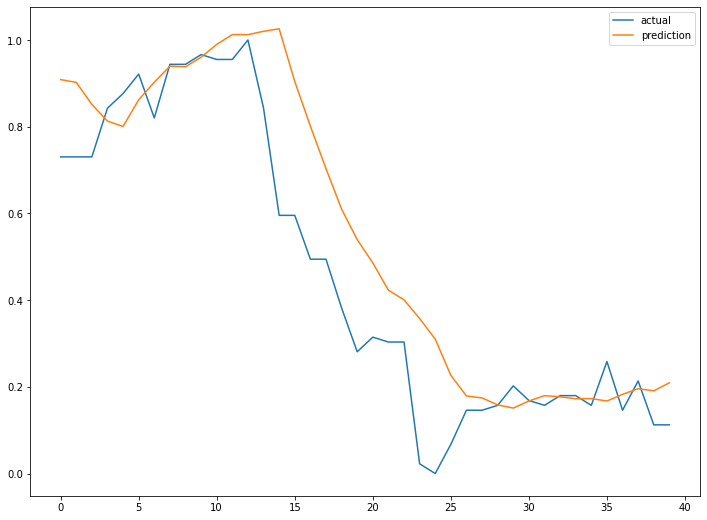

In [37]:
plt.figure(figsize=(12, 9))
plt.plot(test_y, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.legend()
plt.show()